<a id='Introduction'></a>

# 1. Introduction

In the financial industry, particularly in banking and lending institutions, one of the most critical tasks is to assess the likelihood of loan default. Predicting whether a borrower will default on a loan helps institutions manage risk more effectively and maintain healthy cash flow. A loan default not only impacts the institution financially but also can influence decisions regarding future lending.

With the rapid advancement of machine learning techniques, data-driven models can now be used to predict loan defaults more accurately than ever before. By analyzing historical data, these models can identify patterns and key factors associated with defaults. This enables financial institutions to make informed decisions, improve loan approval processes, and mitigate risk.


In this project, we will build a machine learning model to predict whether a customer will default on a loan based on various features such as loan amount, interest rates, credit score, and customer demographics. The model's goal is to improve prediction accuracy and aid financial institutions in better risk management.

### Objective

The main objective of this project is to build a robust machine learning model that can predict whether a loan will default. We will explore and analyze the dataset to understand key trends and relationships between variables, clean and preprocess the data, and then build a model to make predictions.




# Table of Contents

<a href='#Introduction'>1. Introduction </a>

<a href='#EDA'>2. Understanding the data & Exploratory Data Analysis (EDA)</a>

<a href='#Cleaning'>3. Data Cleaning & Pre-processing</a>

<a href='#Feature Selection'>4. Feature Slection</a>

<a href='#Model'>5. Model Building & Evaluation</a>

<a href='#Interpretation'>6. Model Interpretation & Insights: Feature Importance Analysis</a>

<a href='#Deployment'>7. Model Validation and Deployment</a>

<a href='#Conclusion'>8. Conclusion</a>

<a href='#Appendix'>9. Appendix</a>

<a id='EDA'></a>

# 2. Understanding the data & Exploratory Data Analysis (EDA)

In this project, we will use a dataset provided by [Kaggle](#https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data) to train an machine learning model to achieve the goal. The dataset is provided under CC0 1.0 Universal license.

Here, we will understand the data, identify patterns, and undercover insights that will help in the later stages of this project, such as feature selection and model building.

### 2.1 Overview of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings


warnings.filterwarnings('ignore')

# Accessing full dataset
full_data = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")

# We will split the data into training and validation sets. 
# So that the smaller set can be used to validated data with unseen data later

train_data, valid_data = train_test_split(full_data, test_size = 0.15, random_state = 0)

train_data.to_csv('train_data.csv', index=False)
valid_data.to_csv('valid_data.csv', index=False)


data = pd.read_csv('train_data.csv')

In [2]:
# We can check the first five rows of the dataset

data.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  170054  2019         cf              Joint           pre     type2   
1  124148  2019         cf               Male         nopre     type1   
2   34228  2019         cf               Male         nopre     type1   
3   75596  2019         cf  Sex Not Available           pre     type1   
4   73660  2019         cf               Male         nopre     type2   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                    b/c  ...   
1           p3                l1        nopc                  nob/c  ...   
2           p4                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p3                l1        nopc                    b/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0         CRIF           741                       EXP  35-44   
1         CRIF           849                       CIB  35-44   
2          CIB           731                       CIB  35-44   
3         CRIF           742                       CIB  45-54   
4          EXP           522                       CIB  65-74   

   submission_of_application        LTV   Region Security_Type  Status dtir1  
0                   not_inst  97.690763    North        direct       0  42.0  
1                   not_inst  68.338323    North        direct       1  13.0  
2                   not_inst  74.525316    North        direct       0  32.0  
3                    to_inst  13.477366    south        direct       0  42.0  
4                   not_inst  80.957944  central        direct       0  55.0  

[5 rows x 34 columns]

In [3]:
# Shape of dataset - Number of rows and columns

data.shape

(126369, 34)

In [4]:
# Names of columns of the data

data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
# overview of the data structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126369 entries, 0 to 126368
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         126369 non-null  int64  
 1   year                       126369 non-null  int64  
 2   loan_limit                 123509 non-null  object 
 3   Gender                     126369 non-null  object 
 4   approv_in_adv              125590 non-null  object 
 5   loan_type                  126369 non-null  object 
 6   loan_purpose               126250 non-null  object 
 7   Credit_Worthiness          126369 non-null  object 
 8   open_credit                126369 non-null  object 
 9   business_or_commercial     126369 non-null  object 
 10  loan_amount                126369 non-null  int64  
 11  rate_of_interest           95402 non-null   float64
 12  Interest_rate_spread       95239 non-null   float64
 13  Upfront_charges            92

In [6]:
# Summary statistics of numeric columns

data.describe()

ID      year   loan_amount  rate_of_interest  \
count  126369.000000  126369.0  1.263690e+05      95402.000000   
mean    99135.091969    2019.0  3.310640e+05          4.045575   
std     42916.876218       0.0  1.838085e+05          0.561717   
min     24891.000000    2019.0  1.650000e+04          0.000000   
25%     62024.000000    2019.0  1.965000e+05          3.625000   
50%     98980.000000    2019.0  2.965000e+05          3.990000   
75%    136321.000000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          7.750000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count          95239.000000     92646.000000  126336.000000    1.135400e+05   
mean               0.440859      3219.422918     335.166231    4.974507e+05   
std                0.512698      3244.440258      58.349776    3.555888e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.075400       582.030000     360.000000    2.680000e+05   
50%                0.389200      2592.455000     360.000000    4.180000e+05   
75%                0.773650      4806.030000     360.000000    6.280000e+05   
max                2.885400     60000.000000     360.000000    1.100800e+07   

              income   Credit_Score            LTV         Status  \
count  118552.000000  126369.000000  113540.000000  126369.000000   
mean     6953.066334     699.859475      72.795664       0.246342   
std      6547.130526     115.891124      42.617160       0.430882   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.196911       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  105829.000000  
mean       37.734534  
std        10.555164  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [7]:
# Summary statistics of Categorical columns

data.describe(include = 'object')

loan_limit  Gender approv_in_adv loan_type loan_purpose  \
count      123509  126369        125590    126369       126250   
unique          2       4             2         3            4   
top            cf    Male         nopre     type1           p3   
freq       115061   35959        105947     96165        47425   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
count             126369      126369                 126369            126267   
unique                 2           2                      2                 2   
top                   l1        nopc                  nob/c           not_neg   
freq              120911      125878                 108701            113491   

       interest_only  ... construction_type occupancy_type Secured_by  \
count         126369  ...            126369         126369     126369   
unique             2  ...                 2              3          2   
top          not_int  ...                sb             pr       home   
freq          120278  ...            126339         117451     126339   

       total_units credit_type co-applicant_credit_type     age  \
count       126369      126369                   126369  126206   
unique           4           4                        2       7   
top             1U         CIB                      CIB   45-54   
freq        124497       40896                    63289   29590   

       submission_of_application  Region Security_Type  
count                     126206  126369        126369  
unique                         2       4             2  
top                      to_inst   North        direct  
freq                       81423   63451        126339  

[4 rows x 21 columns]

In [8]:
# Number of unique values in each column

data.nunique()

ID                           126369
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     207
rate_of_interest                128
Interest_rate_spread          21790
Upfront_charges               50593
term                             25
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  371
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                          962
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [9]:
# Number of missing values in each column

data.isnull().sum()

ID                               0
year                             0
loan_limit                    2860
Gender                           0
approv_in_adv                  779
loan_type                        0
loan_purpose                   119
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             30967
Interest_rate_spread         31130
Upfront_charges              33723
term                            33
Neg_ammortization              102
interest_only                    0
lump_sum_payment                 0
property_value               12829
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        7817
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            163
submission_of_applic

### Insights

- The dataset contains 34 columns, out of which 21 are categorical columns, and 13 are numerical columns. There are 126369 rows in the dataset.
- `Status` is the target variable, where two classes of loan default status are shown. (0 - Not Defaulted, 1 - Defaulted)
- `ID` column contains identification numbers of each record.
- `year` has only one value, 2019. Our dataset is based on the loan records of year 2019.
- There are missing values in 14 columns, which will we need to handle in the next sections.

## 2.2 Distribution of the Target Variable (Status)

The distribution of `Status` variable is hereby assessed. 

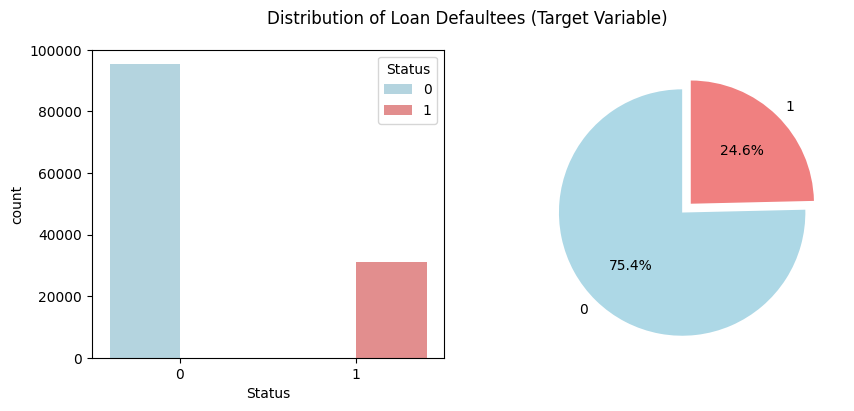

Percentage of defaulters is : 24.634%


In [10]:
status_counts = data['Status'].value_counts()
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=data, x='Status', hue = 'Status',  palette=['lightblue', 'lightcoral'])  
plt.subplot(1,2,2)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'lightcoral'], explode = [0.1,0])
plt.suptitle('Distribution of Loan Defaultees (Target Variable)')

plt.show()

print(f"Percentage of defaulters is : {(data['Status'].sum()/data.shape[0])*100:.3f}%")

#### Insights

The aim of this project is to build an ML model which can predict a debtor would default their loan or not. In our training dataset, we observed that approximately 25% of borrowers have defaulted on their loans. This indicates that loan defaults are not uncommon, and a predictive model could provide substantial value to financial institutions by helping them identify high-risk borrowers early in the process.

Moreover, the imbalance in the target variable may be looked into, as this could influence the behaviour of model.

## 2.3 Analysis of Numerical Features

In [11]:
cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Removing target variable - 'Status' and unwanted variables 'ID' & 'year' from the list of features
num_cols.remove('Status') # Target variable
num_cols.remove('ID') # ID will not contribute in the modeling
num_cols.remove('year') # The dataset contains only one value for year

num_cols_with_target = num_cols.copy()
num_cols_with_target.append('Status')

### Correlation Matrix

Now, we will calculate the correlation matrix, which shows the correlation coefficients between numerical variables. Correlation coefficients gives the strength of linear relationships between the variables.

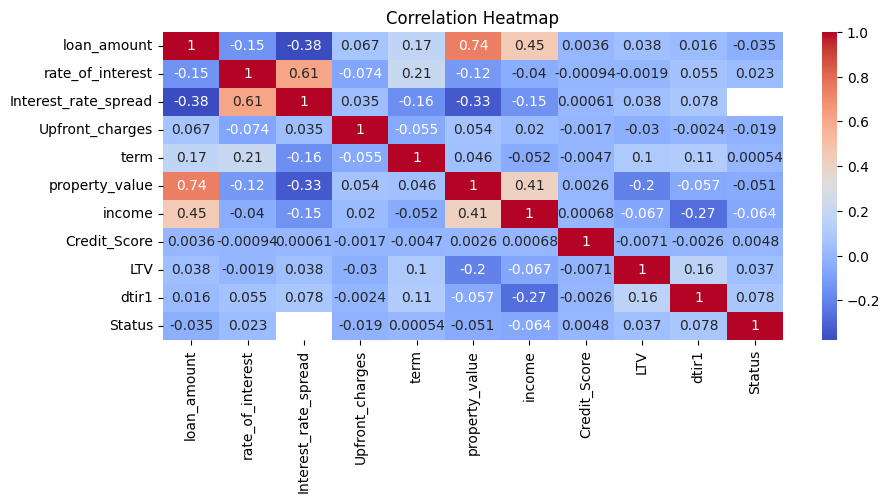

In [12]:
correlation_matrix = data[num_cols_with_target].corr()

# Visualizing correlation heatmap
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
correlation_matrix

loan_amount  rate_of_interest  Interest_rate_spread  \
loan_amount              1.000000         -0.150377             -0.377046   
rate_of_interest        -0.150377          1.000000              0.614973   
Interest_rate_spread    -0.377046          0.614973              1.000000   
Upfront_charges          0.066730         -0.073976              0.034620   
term                     0.173662          0.209269             -0.156579   
property_value           0.737338         -0.119322             -0.333241   
income                   0.453534         -0.040113             -0.150289   
Credit_Score             0.003635         -0.000944              0.000615   
LTV                      0.037601         -0.001927              0.037920   
dtir1                    0.016360          0.055342              0.078175   
Status                  -0.034957          0.022597                   NaN   

                      Upfront_charges      term  property_value    income  \
loan_amount                  0.066730  0.173662        0.737338  0.453534   
rate_of_interest            -0.073976  0.209269       -0.119322 -0.040113   
Interest_rate_spread         0.034620 -0.156579       -0.333241 -0.150289   
Upfront_charges              1.000000 -0.054615        0.053688  0.019867   
term                        -0.054615  1.000000        0.045846 -0.052214   
property_value               0.053688  0.045846        1.000000  0.414122   
income                       0.019867 -0.052214        0.414122  1.000000   
Credit_Score                -0.001718 -0.004673        0.002569  0.000685   
LTV                         -0.030049  0.100137       -0.204839 -0.067426   
dtir1                       -0.002360  0.110761       -0.056723 -0.267086   
Status                      -0.019101  0.000541       -0.051318 -0.063916   

                      Credit_Score       LTV     dtir1    Status  
loan_amount               0.003635  0.037601  0.016360 -0.034957  
rate_of_interest         -0.000944 -0.001927  0.055342  0.022597  
Interest_rate_spread      0.000615  0.037920  0.078175       NaN  
Upfront_charges          -0.001718 -0.030049 -0.002360 -0.019101  
term                     -0.004673  0.100137  0.110761  0.000541  
property_value            0.002569 -0.204839 -0.056723 -0.051318  
income                    0.000685 -0.067426 -0.267086 -0.063916  
Credit_Score              1.000000 -0.007092 -0.002631  0.004805  
LTV                      -0.007092  1.000000  0.158129  0.037299  
dtir1                    -0.002631  0.158129  1.000000  0.078223  
Status                    0.004805  0.037299  0.078223  1.000000

### Pair Plots of Numerical Features

Pair plots are useful for identifying relationships between numerical features, as they allow us to visualize how variables correlate with one another and the target variable. By analyzing these plots, we can spot trends, patterns, and potential outliers.

The diagonal of the pair plot shows the distribution of individual numerical features.

The off-diagonal plots show pairwise relationships between numerical features.

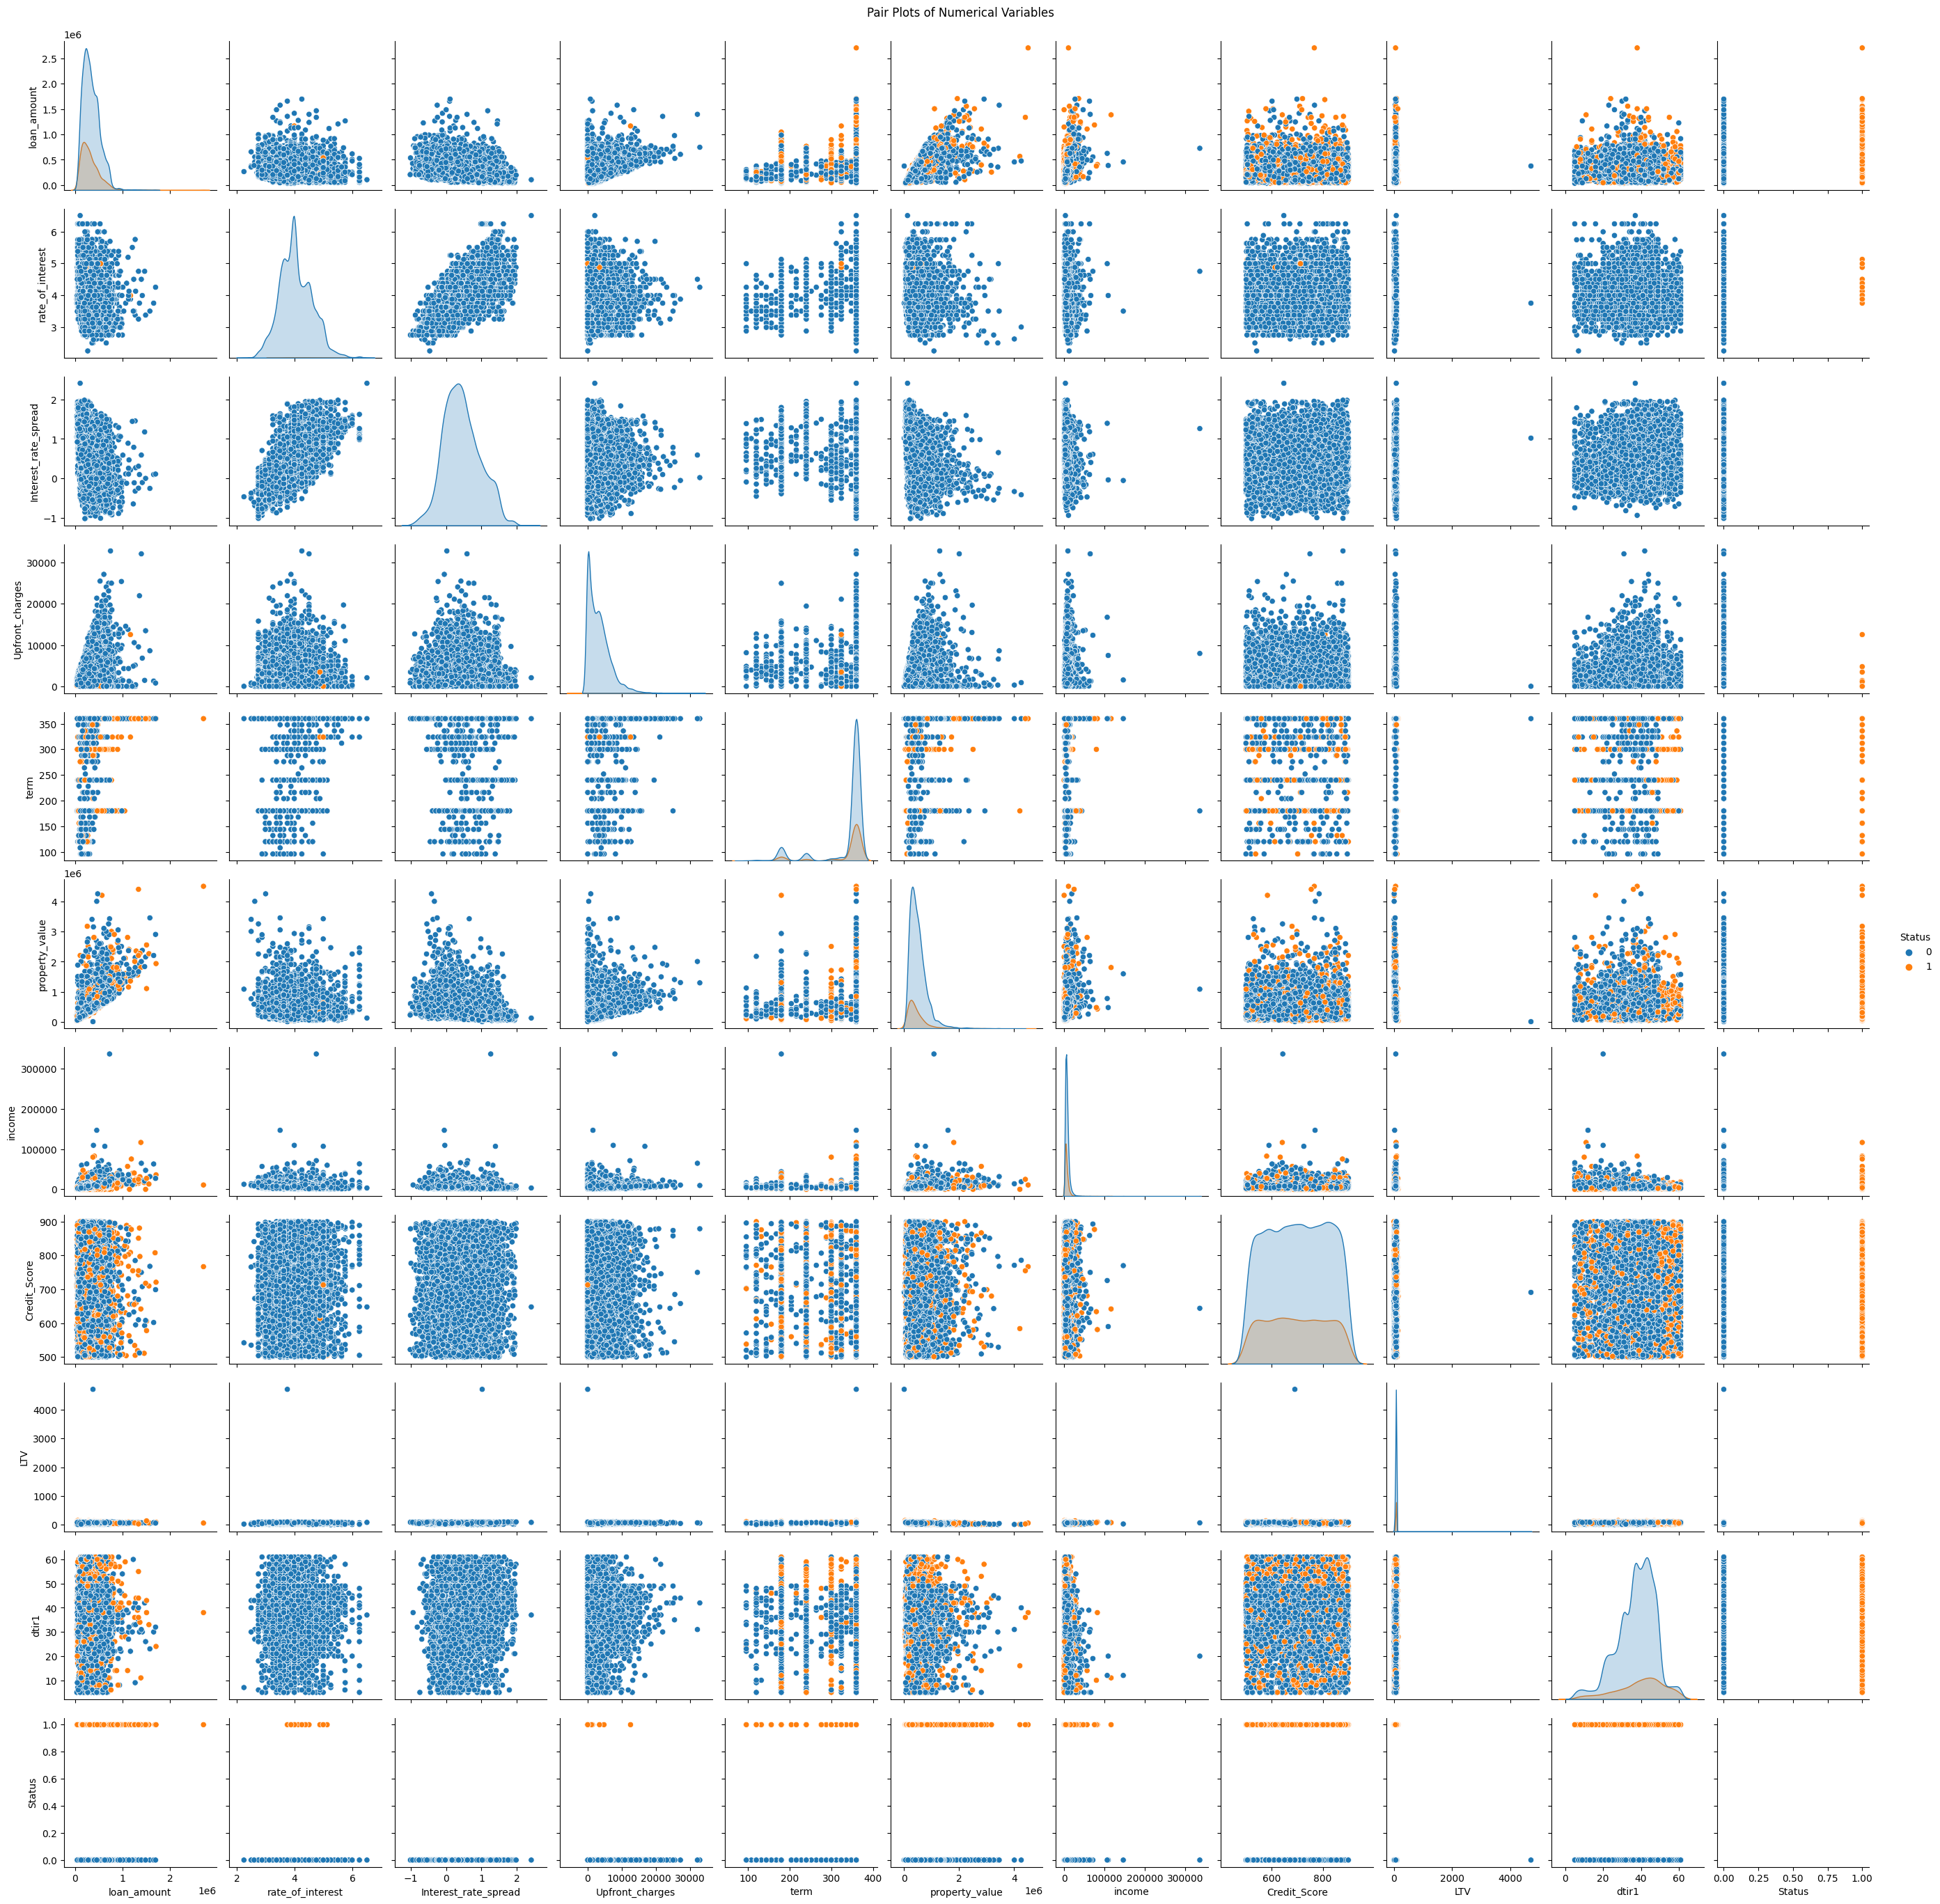

In [14]:
sample_data = data.sample(frac=0.1, random_state=0)
sns.pairplot(sample_data, vars=num_cols_with_target, hue='Status', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plots of Numerical Variables', y=1)
plt.show()

#### Brief Insights from Correlations and Pair Plots

- Numerical features in this dataset show not so much strong correlation with the target variable.
- The top 5 correlated variables to 'Status' are:
    
    1. `dtir1`
    2. `income`
    3. `property_value`
    4. `LTV`
    5. `loan_amount`
    
- `Interest_rate_spread` does not show any correlation, but raises a NaN. More detailed anaylsis of this variable is needed.

- `rate_of_interest` and `Interest_rate_spread` are very much correlated.
- A noticable correlation is there between `loan_amount`, `income`, and `property_value`.
- `rate_of_interest` and `Interest_rate_spread` also shows strong correlation.
- `Income` and `dtir1` shows a medium, negative correlation. Enlightens the fact that, more income having borrowers have lesser debt to income ratio.

From the analysis of correlations and pair plots, we infer the idea that, the features show a weak linear relationship with target variable. While model building, we need to ensure, if regression model is built, it performs well.

### Analysis of Distribution of Numerical Features

We can use histograms to visualize the distribution of numerical features. This helps to identify the spread, central tendency, and any outliers in the data.

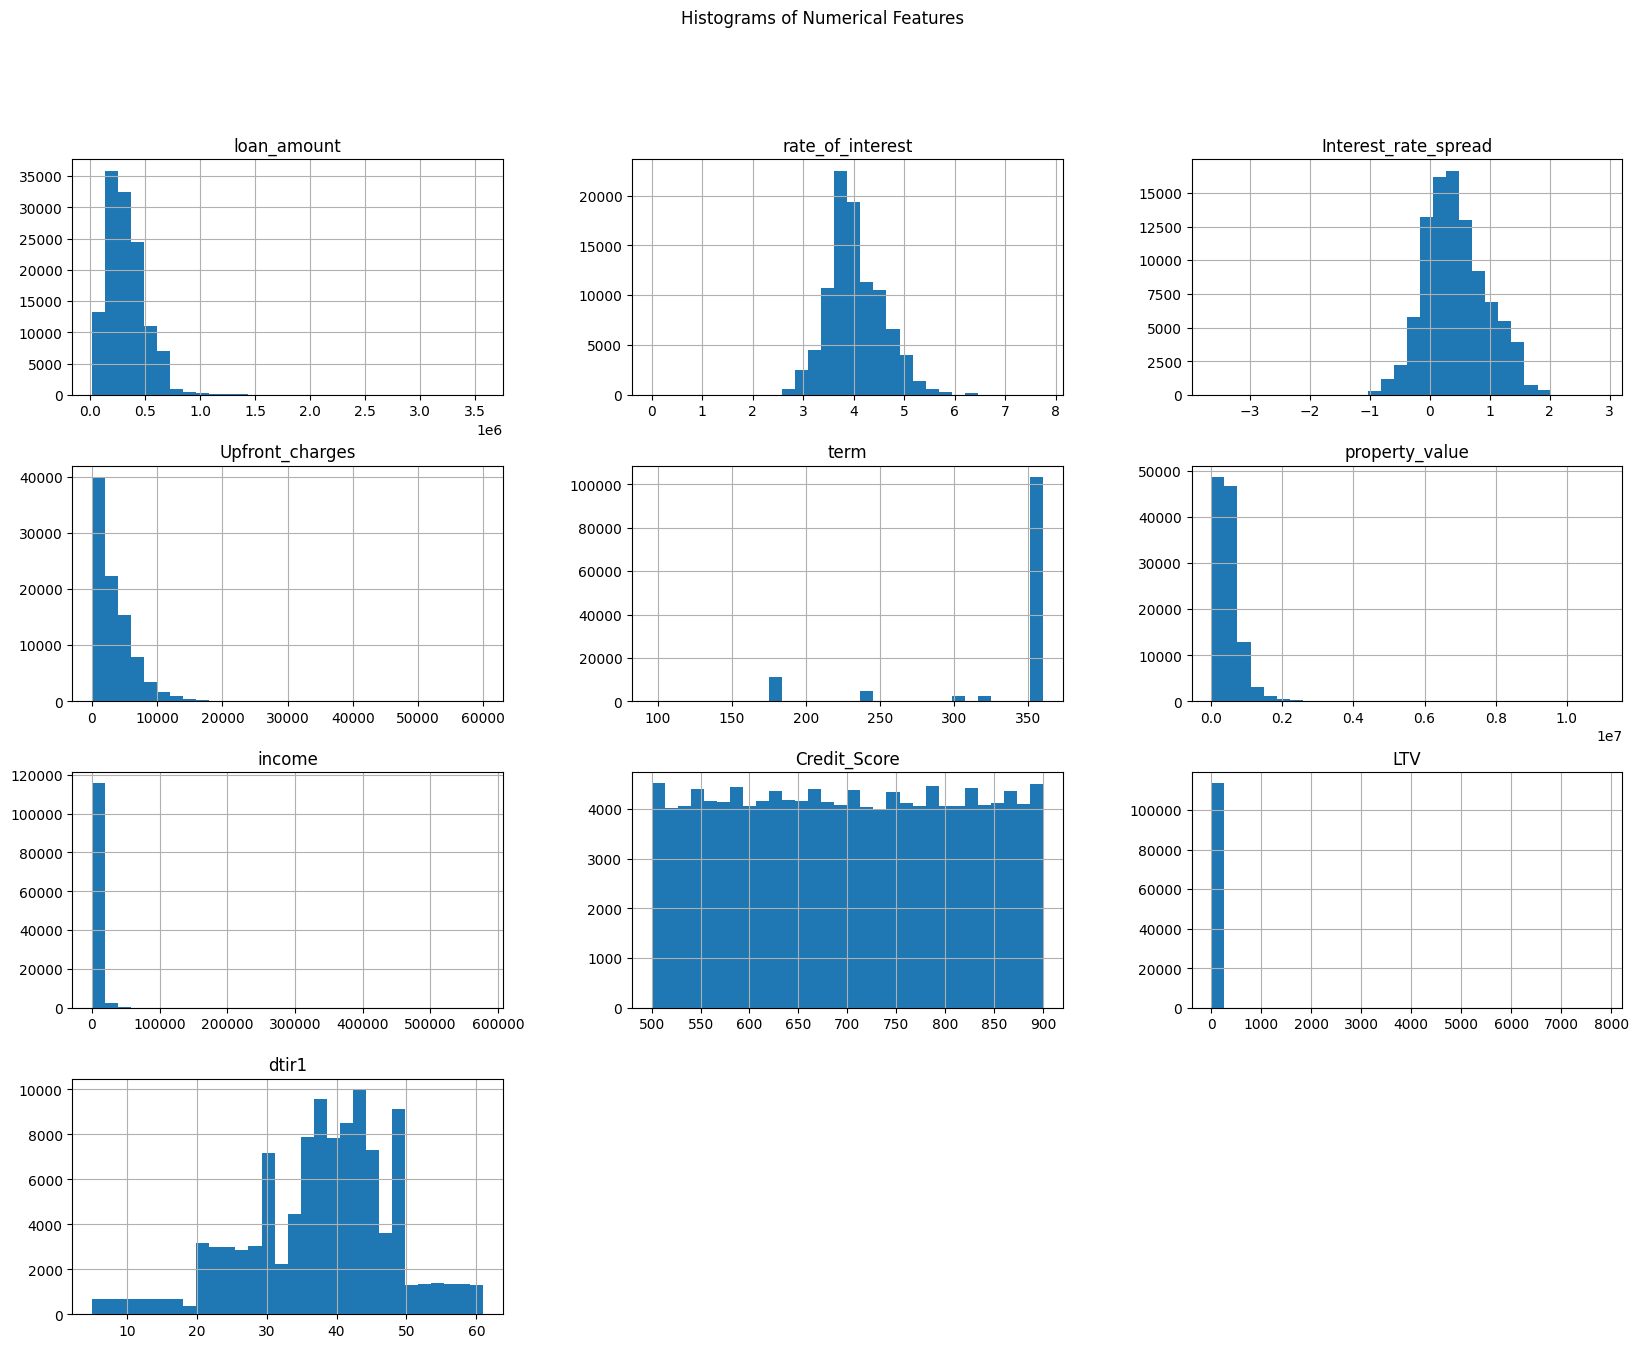

In [15]:
data[num_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### Boxplots of Numerical Features

We also visualize the numerical features on box plots.
Box plots are great for identifying outliers and understanding the spread and variability of the data.

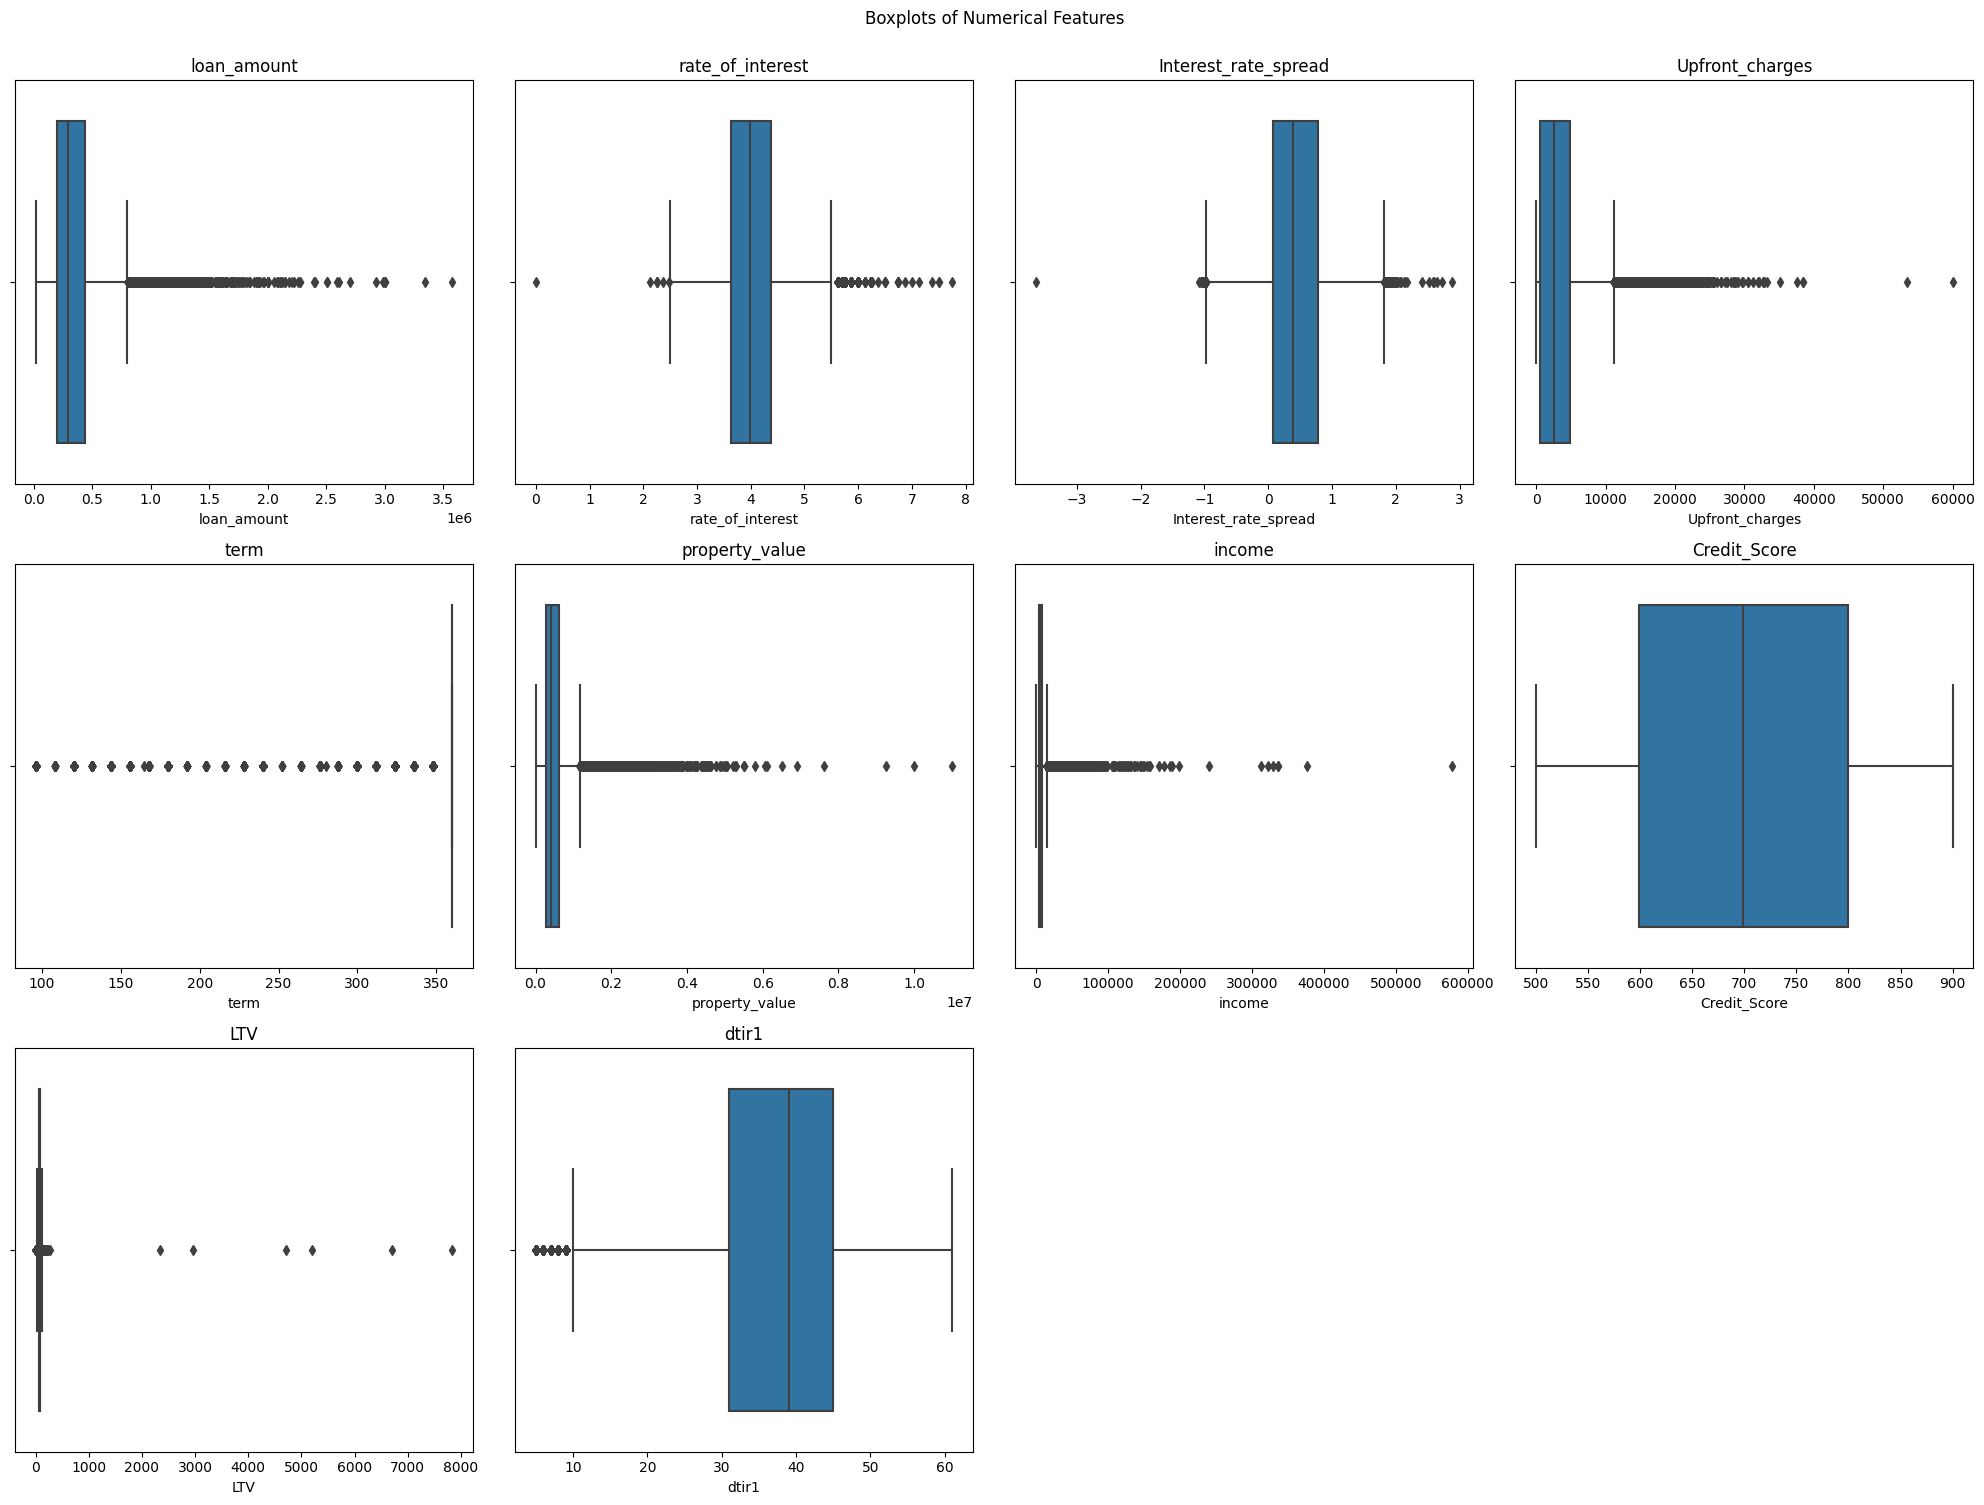

In [16]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,4, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.suptitle('Boxplots of Numerical Features', y = 1)
plt.tight_layout()
plt.show()

### Insights from Analyis of Numerical Features

#### 1. Loan Amount

The `loan_amount` distribution follows a normal distribution but, it is right skewed. That means, most number of the loan amounts are concentrated at the lower amounts.

This variable shows a high collinearity with `income`, as the maximum amount of loans are usually decided with respect to the income limits. In real world, the distribution of income is always positively skewed. So, it is not a suprising fact that, the loan_amount variable also follows the right-skewed distribution.

There are a quarter portion of the data is missing for this variable. So in the data cleaning section, we need to consider appropriate strategy for handling the missing data.

In [17]:
loan_amount_skewness = data['loan_amount'].skew()
print(f'Skewness of loan amount: {loan_amount_skewness:.2f}')
print(f"Percentage of Missing Values in rate_of_interest: {((data.shape[0]- data['rate_of_interest'].count())/ data.shape[0])*100:.2f}%")

Skewness of loan amount: 1.67
Percentage of Missing Values in rate_of_interest: 24.51%


<a id='EDA Interest'></a>

#### 2. Rate of Interest and Interest Rate Spread

There is a strong positive correlation between `Interest_rate_spread` and `rate_of_interest`, suggesting that higher interest loans may also have higher spreads.

The `rate_of_interest` also follows normal distribution so as the `Interest_rate_spread`. 

There are about 25% of missing values in these columns. So in the data cleaning step, we need to consider appropriate strategy for handling those.

A highlightened fact to be checked that, for the `Interest_rate_spread`, the correlation with the target variable is NaN. So we have analyzed the variable in-depth. (<a href='#appendix_analysis_irs'>Detailed analysis is given in the appendix. </a>)

#### Key Observations on Interest Rate Spread

- `Interest_rate_spread` has non-missing values only for records with Status = 0 (non-default). There are no observed values for Status = 1 (default). This fact limits the variable’s ability to provide insight for predicting default cases and raises concerns.

-  After imputing with median value, the correlation between `Interest_rate_spread` and Status is -0.04, indicating that it has little to no linear relationship with the likelihood of default. This suggests that `Interest_rate_spread` is not directly related of the default outcome.

- __Potential Data Leakage Risk:__ Given that values of `Interest_rate_spread` are only observed for non-default cases, including this feature may introduce bias, particularly when imputing missing values for default cases.


Given the surprisig, but riskier findings on `Interest_rate_spread` variable, we have extended similar analysis on `rate_of_interest` also. (<a href='#9.2'> Detailed analysis is given in the appendix.</a>)

#### Key Observations on Rate of Interst

- `Rate_of_interest` is missing for all records where Status = 1, totaling 30,967 missing values. Conversely, nearly all non-missing values belong to Status = 0, with only 163 cases having values for Status = 1

- The correlation between `rate_of_interest` and Status was initially 0.023, indicating a very weak relationship. After imputing missing values (with the median), the correlation shifted to -0.046, showing minimal impact but introducing a slightly negative association.

- As similar to `Interest_rate_spread`, the data leakage may be doubted in this feature also.

In [18]:
rate_of_interest_skewness = data['rate_of_interest'].skew()
print(f"Skewness of rate_of_interest: {rate_of_interest_skewness:.2f}")
print(f"Percentage of Missing Values in rate_of_interest: {((data.shape[0]- data['rate_of_interest'].count())/ data.shape[0])*100:.2f}%")

Interest_rate_spread_skewness = data['Interest_rate_spread'].skew()
print(f"Skewness of Interest_rate_spread: {Interest_rate_spread_skewness:.2f}")
print(f"Percentage of Missing Values in Interest_rate_spread: {((data.shape[0]- data['Interest_rate_spread'].count())/ data.shape[0])*100:.2f}%")

Skewness of rate_of_interest: 0.39
Percentage of Missing Values in rate_of_interest: 24.51%
Skewness of Interest_rate_spread: 0.28
Percentage of Missing Values in Interest_rate_spread: 24.63%


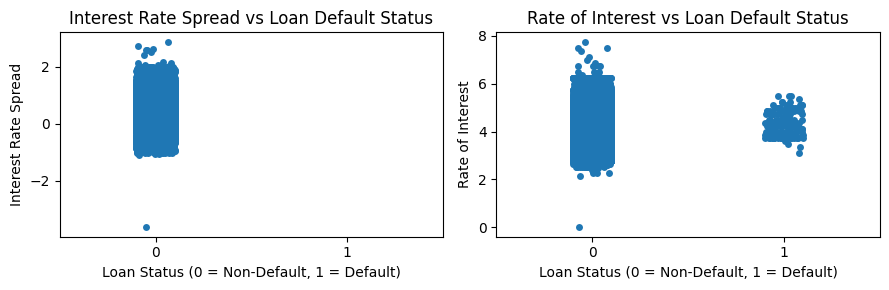

Interest Rate Spread Counts:  Status
0    95239
1        0
Name: Interest_rate_spread, dtype: int64


In [19]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
sns.stripplot(x='Status', y='Interest_rate_spread', data=data, jitter=True)
plt.title('Interest Rate Spread vs Loan Default Status')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Interest Rate Spread')

plt.subplot(1,2,2)
sns.stripplot(x='Status', y='rate_of_interest', data=data, jitter=True)
plt.title('Rate of Interest vs Loan Default Status')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Rate of Interest')

plt.tight_layout()
plt.show()

print("Interest Rate Spread Counts: ",data.groupby('Status')['Interest_rate_spread'].count())

<a id='EDA Upfront'></a>

#### 3. Upfront Charges

In the financial industry, upfront charges, such as loan processing fees, are a standard component of loan transactions. However, the data in this column shows some notable patterns:

- __Missing Values:__ Over 26% of the data in the `upfront_charges` column is missing. This will need to be addressed during data cleaning, possibly through imputation or removal.

- __Zero Values__: Around 19% of the non-missing values are exactly 0. This is not uncommon in the financial sector, where certain types of loans may be offered with zero upfront charges, either as part of promotional offers or as a feature of specific loan products. Thus, zero upfront charges can be considered normal for some loans.

- __Distribution__: The distribution of `upfront_charges` is heavily right-skewed with several outliers at the higher end. This could be expected since upfront charges are often proportional to loan amounts, and our data already shows that the `loan_amount` column is also right-skewed. But their correlation is not much strong, as there are a lot zero upfront_charge data.

The high number of missing values in this feature led to a detailed analysis as before. (<a href='#9.3'> See Appendix</a>)

#### Key Observations

- `Upfront_charges` has a substantial number of missing values (33,723), with a striking imbalance: 31,004 missing values occur in records where Status = 1 (default). For non-default cases (Status = 0), only 2,719 values are missing. 

- Such lack of reliability might also promote a chance for data leakage. So including this as a feature for training the model might be questionable. So, thorough checking of the performance of the model should be carried out, while using this variable.

In [20]:
zero_charges = data[data['Upfront_charges'] == 0].shape[0]

print(f"Skewness of Upfront_charges: {data['Upfront_charges'].skew()}")
print(f"Percentage of Missing Values in Upfront_charges: {((data.shape[0]- data['Upfront_charges'].count())/ data.shape[0])*100:.2f}%")
print(f"Number of loans with zero Upfront_charges : {zero_charges}")
print(f"Percentage of zero values in the Upfront_charges column: {(zero_charges/data['Upfront_charges'].count())*100:.2f}%")

Skewness of Upfront_charges: 1.774019794942584
Percentage of Missing Values in Upfront_charges: 26.69%
Number of loans with zero Upfront_charges : 17686
Percentage of zero values in the Upfront_charges column: 19.09%


#### 4. Term

The loan terms in the dataset are heavily skewed towards longer durations, with the majority set at 360 months (30 years). This aligns with the typical structure of housing loans, where long-term repayment schedules make larger loan amounts more affordable through smaller monthly installments.

However, there is an underrepresentation of short-term loans in the dataset. The minimum loan term in our dataset is 96 months (8 years), indicating that products like personal or small business loans, which typically have shorter terms, may not be as prevalent.

The default rate for loans with various terms does not show a linear pattern.

In [21]:
print(f"Skewness of term: {data['term'].skew()}")
print(f"Percentage of Missing Values in term: {((data.shape[0]- data['term'].count())/ data.shape[0])*100:.2f}%")

Skewness of term: -2.173790866044398
Percentage of Missing Values in term: 0.03%


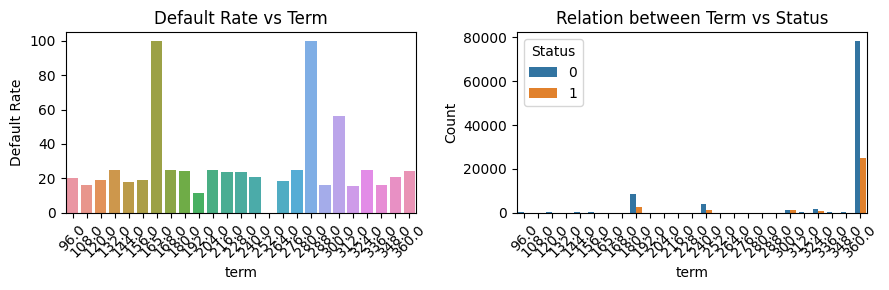

In [22]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
default_rate_term = data.groupby('term')['Status'].mean() * 100
sns.barplot(x = default_rate_term.index, y = default_rate_term.values)
plt.xticks(rotation=45)
plt.ylabel('Default Rate')
plt.title('Default Rate vs Term')

plt.subplot(1,2,2)
sns.countplot(data=data, x='term', hue='Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Relation between Term vs Status')
plt.tight_layout()
plt.show()

<a id='LTV'></a>

#### 5. Property Value and Loan to Value Ratio (LTV)

- The `property_value` variable exhibits a heavily right-skewed distribution, with a skewness of 3.80. This indicates that most properties have relatively lower values, while a smaller number of properties are associated with significantly higher values. This pattern is common in property markets, where high-value properties are less frequent.

- Approximately 10.15% of the records in property_value are missing. This level of missingness necessitates careful handling during the data cleaning process to avoid introducing bias into the analysis.

- The `LTV` variable is derived from the relationship between loan_amount and property_value, reflecting the ratio of the loan amount to the property's value. Due to this dependency, any missing value in loan_amount or property_value results in a corresponding missing value in LTV.

-  The LTV variable displays an extremely high skewness of 117.05, indicating a severe right-skew in its distribution. This suggests that most LTV values are concentrated at the lower end, with a few exceptionally high values.

Both property_value and LTV share the same percentage of missing values (10.15%). Notably, all 12,829 missing values for LTV correspond with missing values in property_value. This strong correlation reinforces the need to address missing data comprehensively

The <a href='#9.4'>detailed analysis</a> shows some crucial facts similar for both the variables:

- Our of total missing values of 12,829, for records with Status = 0 (non-default), only 2 values are missing, and for records with Status = 1 (default), a significant 12,827 values are missing.

- The fact that nearly all missing values correspond to Status = 1 suggests a potential bias, as the imputed values may not accurately reflect the distribution for default cases.

In [23]:
print(f"Skewness of property value: {data['property_value'].skew()}")
print(f"Percentage of Missing Values in property_value: {((data.shape[0]- data['property_value'].count())/ data.shape[0])*100:.2f}%")
print(f"Skewness of LTV: {data['LTV'].skew()}")
print(f"Percentage of Missing Values in LTV: {((data.shape[0]- data['LTV'].count())/ data.shape[0])*100:.2f}%")
missing_ltv = data[data['LTV'].isnull()]
missing_ltv_and_property_value = missing_ltv['property_value'].isnull().sum()
print(f"Out of {missing_ltv.shape[0]} missing LTV values, {missing_ltv_and_property_value} have missing property value as well.")

Skewness of property value: 3.804381291415317
Percentage of Missing Values in property_value: 10.15%
Skewness of LTV: 117.04866599314278
Percentage of Missing Values in LTV: 10.15%
Out of 12829 missing LTV values, 12829 have missing property value as well.


#### 6. Income

- The `income` variable is significantly right-skewed, with the majority of borrowers in lower-income ranges. This pattern mirrors that of `loan_amount`, as lower income levels are more prevalent, and larger loans are typically extended to borrowers with higher income levels. 

- Given that loan amounts are often based on borrower income, income shows a positive correlation with loan_amount. This relationship aligns with lending practices where loan size is proportionate to income, reinforcing the creditworthiness of the borrower.

- __Income Binning and Default Analysis:__ To further explore how income impacts loan default risk, we segmented income into quantiles. This binning approach revealed a trend where default rates are higher among borrowers in the lower income ranges, suggesting that income levels can be a significant predictor of loan repayment capacity.

-  __Missing Values__: The `income` variable has 7,817 missing entries (around 6.2% of the dataset), necessitating a thoughtful approach to handling these gaps.


- __Zero Income Values__: Additionally, 1,091 entries have an income value of zero. These records were closely examined for patterns and potential explanations.

- __Analysis of Zero Income Values by Loan Purpose__: Most zero-income records fall within the `loan_purpose` category `p4`, which is likely indicative of specialized loans for segments like students or unemployed individuals, who may not report income at the time of loan application.


The concentration of zero-income records in the p4 loan purpose category implies that these values represent a legitimate scenario rather than missing information. Zero-income values, therefore, appear to capture a specific borrower profile, possibly reflecting non-income-based eligibility for certain loan types. 

We have also ensured that, the distribution of `loan_purpose` variable is not followed by the zero income values, highlighting a unique and meaningful fact.

Therefore, zero income values are meaningful and should not be treated as missing or imputed, but left as they are.

In [24]:
missing_income = data['income'].isnull().sum()
zero_income = data[data['income'] == 0].shape[0]
print(f'Missing values in income: {missing_income}')
print(f'Number of rows with zero income value :{zero_income}')

print('Distribution of Loan_purpose Variable : \n')
print(data['loan_purpose'].value_counts())

print('\n For records with income values are zero, the counts of borrowers in each loan_purpose is: \n')
print(data[data['income'] == 0][['income', 'loan_purpose']]['loan_purpose'].value_counts())

Missing values in income: 7817
Number of rows with zero income value :1091
Distribution of Loan_purpose Variable : 

loan_purpose
p3    47425
p4    46720
p1    29360
p2     2745
Name: count, dtype: int64

 For records with income values are zero, the counts of borrowers in each loan_purpose is: 

loan_purpose
p4    876
p3    127
p1     71
p2     17
Name: count, dtype: int64


Skewness of income: 17.592076361394913
Percentage of Missing Values in income: 6.19%
Income_Bin
Q1    35.533451
Q2    24.445554
Q3    21.084792
Q4    20.158184
Name: Status, dtype: float64


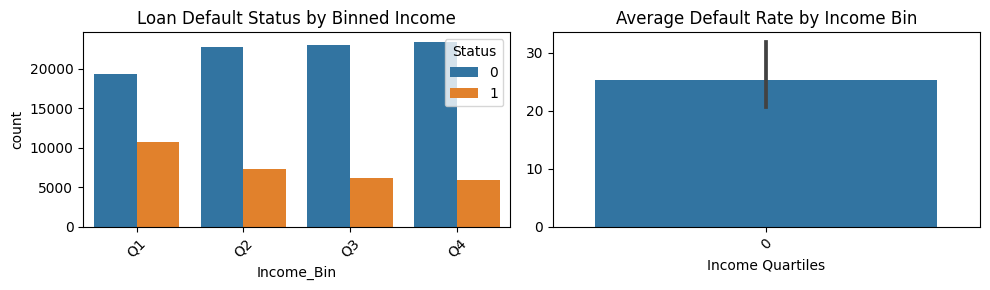

In [25]:
print(f"Skewness of income: {data['income'].skew()}")
print(f"Percentage of Missing Values in income: {((data.shape[0]- data['income'].count())/ data.shape[0])*100:.2f}%")

data['Income_Bin'] = pd.qcut(data['income'], q=4, labels = ['Q1','Q2','Q3','Q4'],  duplicates = 'drop')

income_status = data.groupby('Income_Bin', observed = False)['Status'].mean() * 100
print(income_status)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Loan Default Status by Binned Income')
plt.xticks(rotation = 45)
plt.xlabel('Income Quartiles')
sns.countplot(x='Income_Bin', hue='Status', data=data)
plt.subplot(1,2,2)
sns.barplot(data=income_status)
plt.xticks(rotation = 45)
plt.title("Average Default Rate by Income Bin")
plt.xlabel('Income Quartiles')
plt.tight_layout()
plt.show()

#### 7. Credit Score

`Credit_Score` values in the dataset are complete with no missing data or obvious outliers. Typically, higher credit scores are associated with lower risk, and one would expect a trend where borrowers with higher credit scores default less frequently.

However, upon analyzing the data, the distribution of credit scores appears relatively flat across different loan statuses. From the visualizations below, there doesn't seem to be a clear or strong relationship between Credit_Score and loan default (`Status`). This suggests that in this dataset, credit score may not be a significant predictor of whether a borrower will default on their loan.

Skewness of Credit_Score: 0.004592494869178813
Percentage of Missing Values in Credit_Score: 0.00%


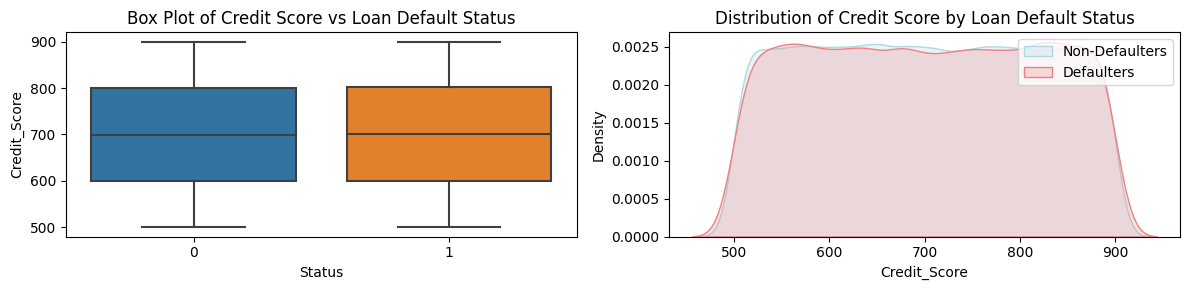

In [26]:
print(f"Skewness of Credit_Score: {data['Credit_Score'].skew()}")
print(f"Percentage of Missing Values in Credit_Score: {((data.shape[0]- data['Credit_Score'].count())/ data.shape[0])*100:.2f}%")

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(x='Status', y='Credit_Score', data=data)
plt.title('Box Plot of Credit Score vs Loan Default Status')

plt.subplot(1,2,2)
sns.kdeplot(data=data[data['Status'] == 0]['Credit_Score'], label='Non-Defaulters', fill=True, color='lightblue')
sns.kdeplot(data=data[data['Status'] == 1]['Credit_Score'], label='Defaulters', fill=True, color='lightcoral')
plt.title('Distribution of Credit Score by Loan Default Status')
plt.legend()

plt.tight_layout()
plt.show()

<a id='DTIR'></a>

#### 8. Debt-to-Income Ratio (`dtir1`)
The Debt-to-Income ratio is an important indicator of a borrower’s financial health. It measures the proportion of a borrower's income that is dedicated to servicing their debt. 

Generally, a higher debt to income ratio is associated with a greater risk of default, as it indicates that the borrower is already using a significant portion of their income to cover debts, leaving less room for unexpected expenses or financial difficulties. From the following visualizations also, this relationship is mildly visible.

- The negative skewness suggests that while most people have moderate DTI ratios, some individuals have very low DTI ratios.

- The missing values are about 16%. Therefore, we ensured that it does not imbalanced over the `Status` classes.<a href='#9.5'> (See appendix)</a>.

- __Low DTI Ratios__: Borrowers with extremely low DTI may have limited credit histories or income, factors that could still place them at risk of default.

- __High DTI Ratios__: High DTI values generally reflect greater debt relative to income, which typically increases financial strain and default risk.

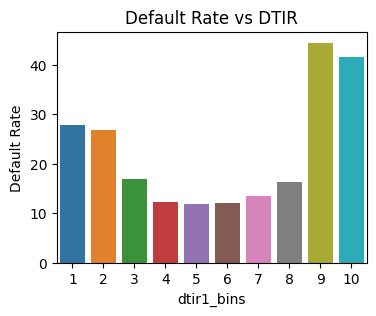

Skewness of Debt to Income Ratio: -0.5510283030164826
Percentage of Missing Values in Debt to Income Ratio: 16.25%


In [27]:
data['dtir1_bins'] = pd.cut(data['dtir1'], bins = 10,  labels= ['1','2','3','4','5','6','7','8','9','10'],)
plt.figure(figsize=(4,3))

default_rate_dtir = data.groupby('dtir1_bins', observed = False)['Status'].mean() * 100
sns.barplot(x = default_rate_dtir.index, y = default_rate_dtir.values)
plt.xticks(rotation=0)
plt.ylabel('Default Rate')
plt.title('Default Rate vs DTIR')
plt.show()

print(f"Skewness of Debt to Income Ratio: {data['dtir1'].skew()}")
print(f"Percentage of Missing Values in Debt to Income Ratio: {((data.shape[0]- data['dtir1'].count())/ data.shape[0])*100:.2f}%")


## 2.3 Analysis of Categorical Features

This section explores each categorical variable’s distribution and its relationship with the target variable (Status). We’ll examine the following:

- __Distribution of each categorical variable:__ Understanding the balance or imbalance within categories.
- __Loan Default Rate per Category:__ Observing the likelihood of default for each category in relation to the target.

In [28]:
for col in cat_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in loan_limit: ['cf' 'ncf' nan]
Unique values in Gender: ['Joint' 'Male' 'Sex Not Available' 'Female']
Unique values in approv_in_adv: ['pre' 'nopre' nan]
Unique values in loan_type: ['type2' 'type1' 'type3']
Unique values in loan_purpose: ['p1' 'p3' 'p4' 'p2' nan]
Unique values in Credit_Worthiness: ['l1' 'l2']
Unique values in open_credit: ['nopc' 'opc']
Unique values in business_or_commercial: ['b/c' 'nob/c']
Unique values in Neg_ammortization: ['not_neg' 'neg_amm' nan]
Unique values in interest_only: ['not_int' 'int_only']
Unique values in lump_sum_payment: ['not_lpsm' 'lpsm']
Unique values in construction_type: ['sb' 'mh']
Unique values in occupancy_type: ['pr' 'ir' 'sr']
Unique values in Secured_by: ['home' 'land']
Unique values in total_units: ['1U' '2U' '3U' '4U']
Unique values in credit_type: ['CRIF' 'CIB' 'EXP' 'EQUI']
Unique values in co-applicant_credit_type: ['EXP' 'CIB']
Unique values in age: ['35-44' '45-54' '65-74' '55-64' '>74' '25-34' '<25' nan]
Unique v

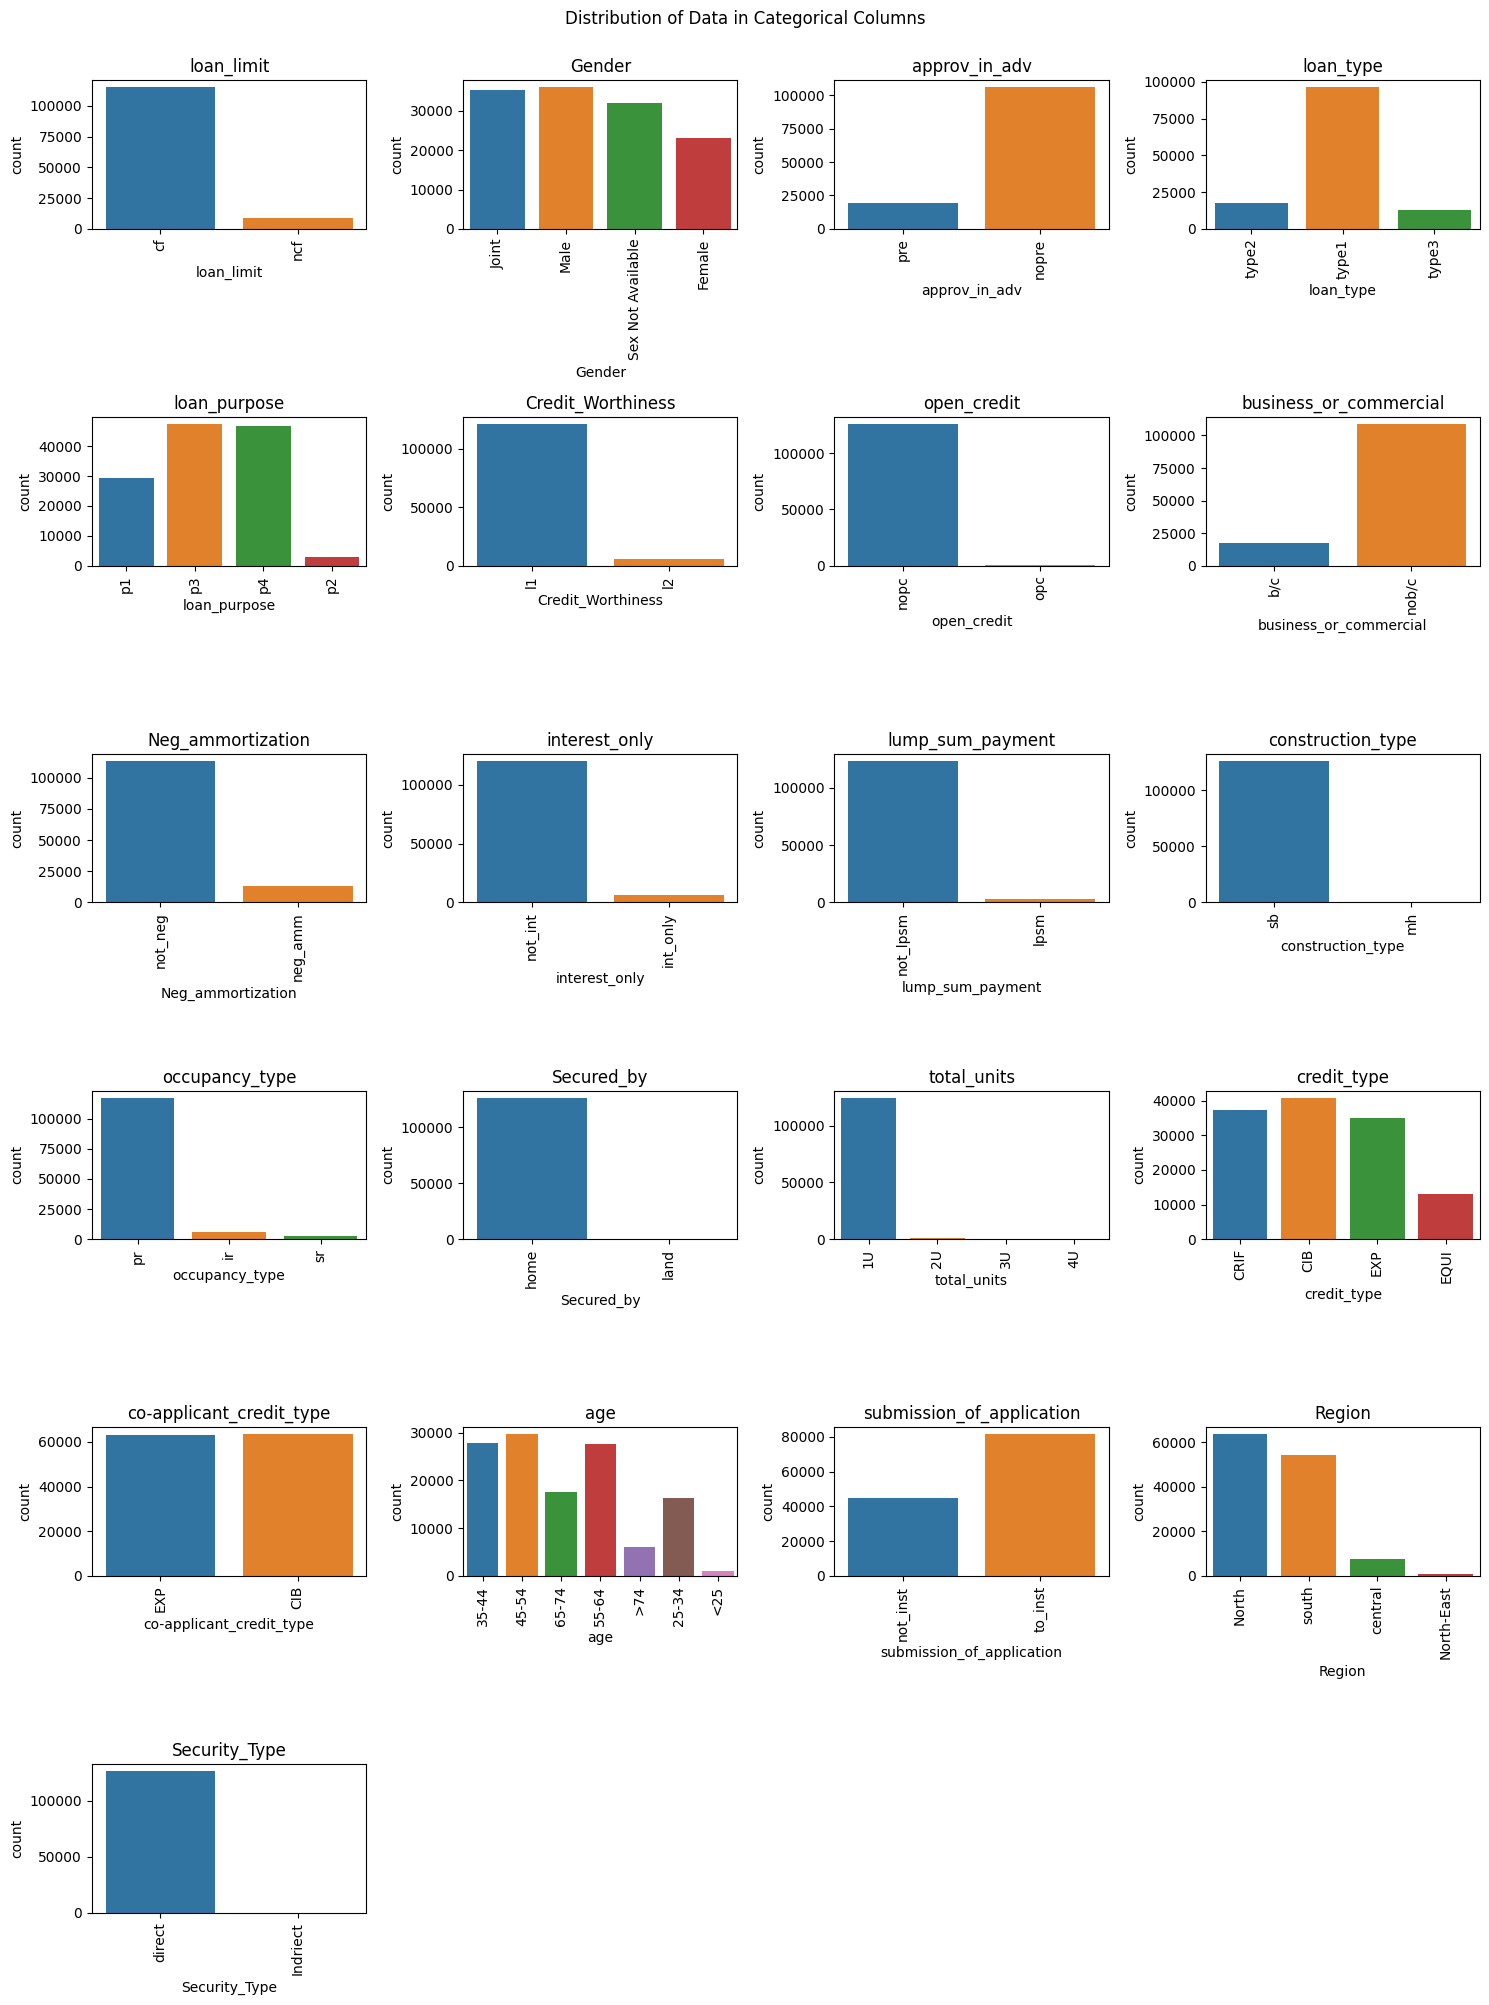

In [29]:
# Plotting distribution of categorical data

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):

    plt.subplot(6,4, i)
    sns.countplot(data=data, x=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.suptitle("Distribution of Data in Categorical Columns", y=1)
plt.tight_layout()
plt.show()

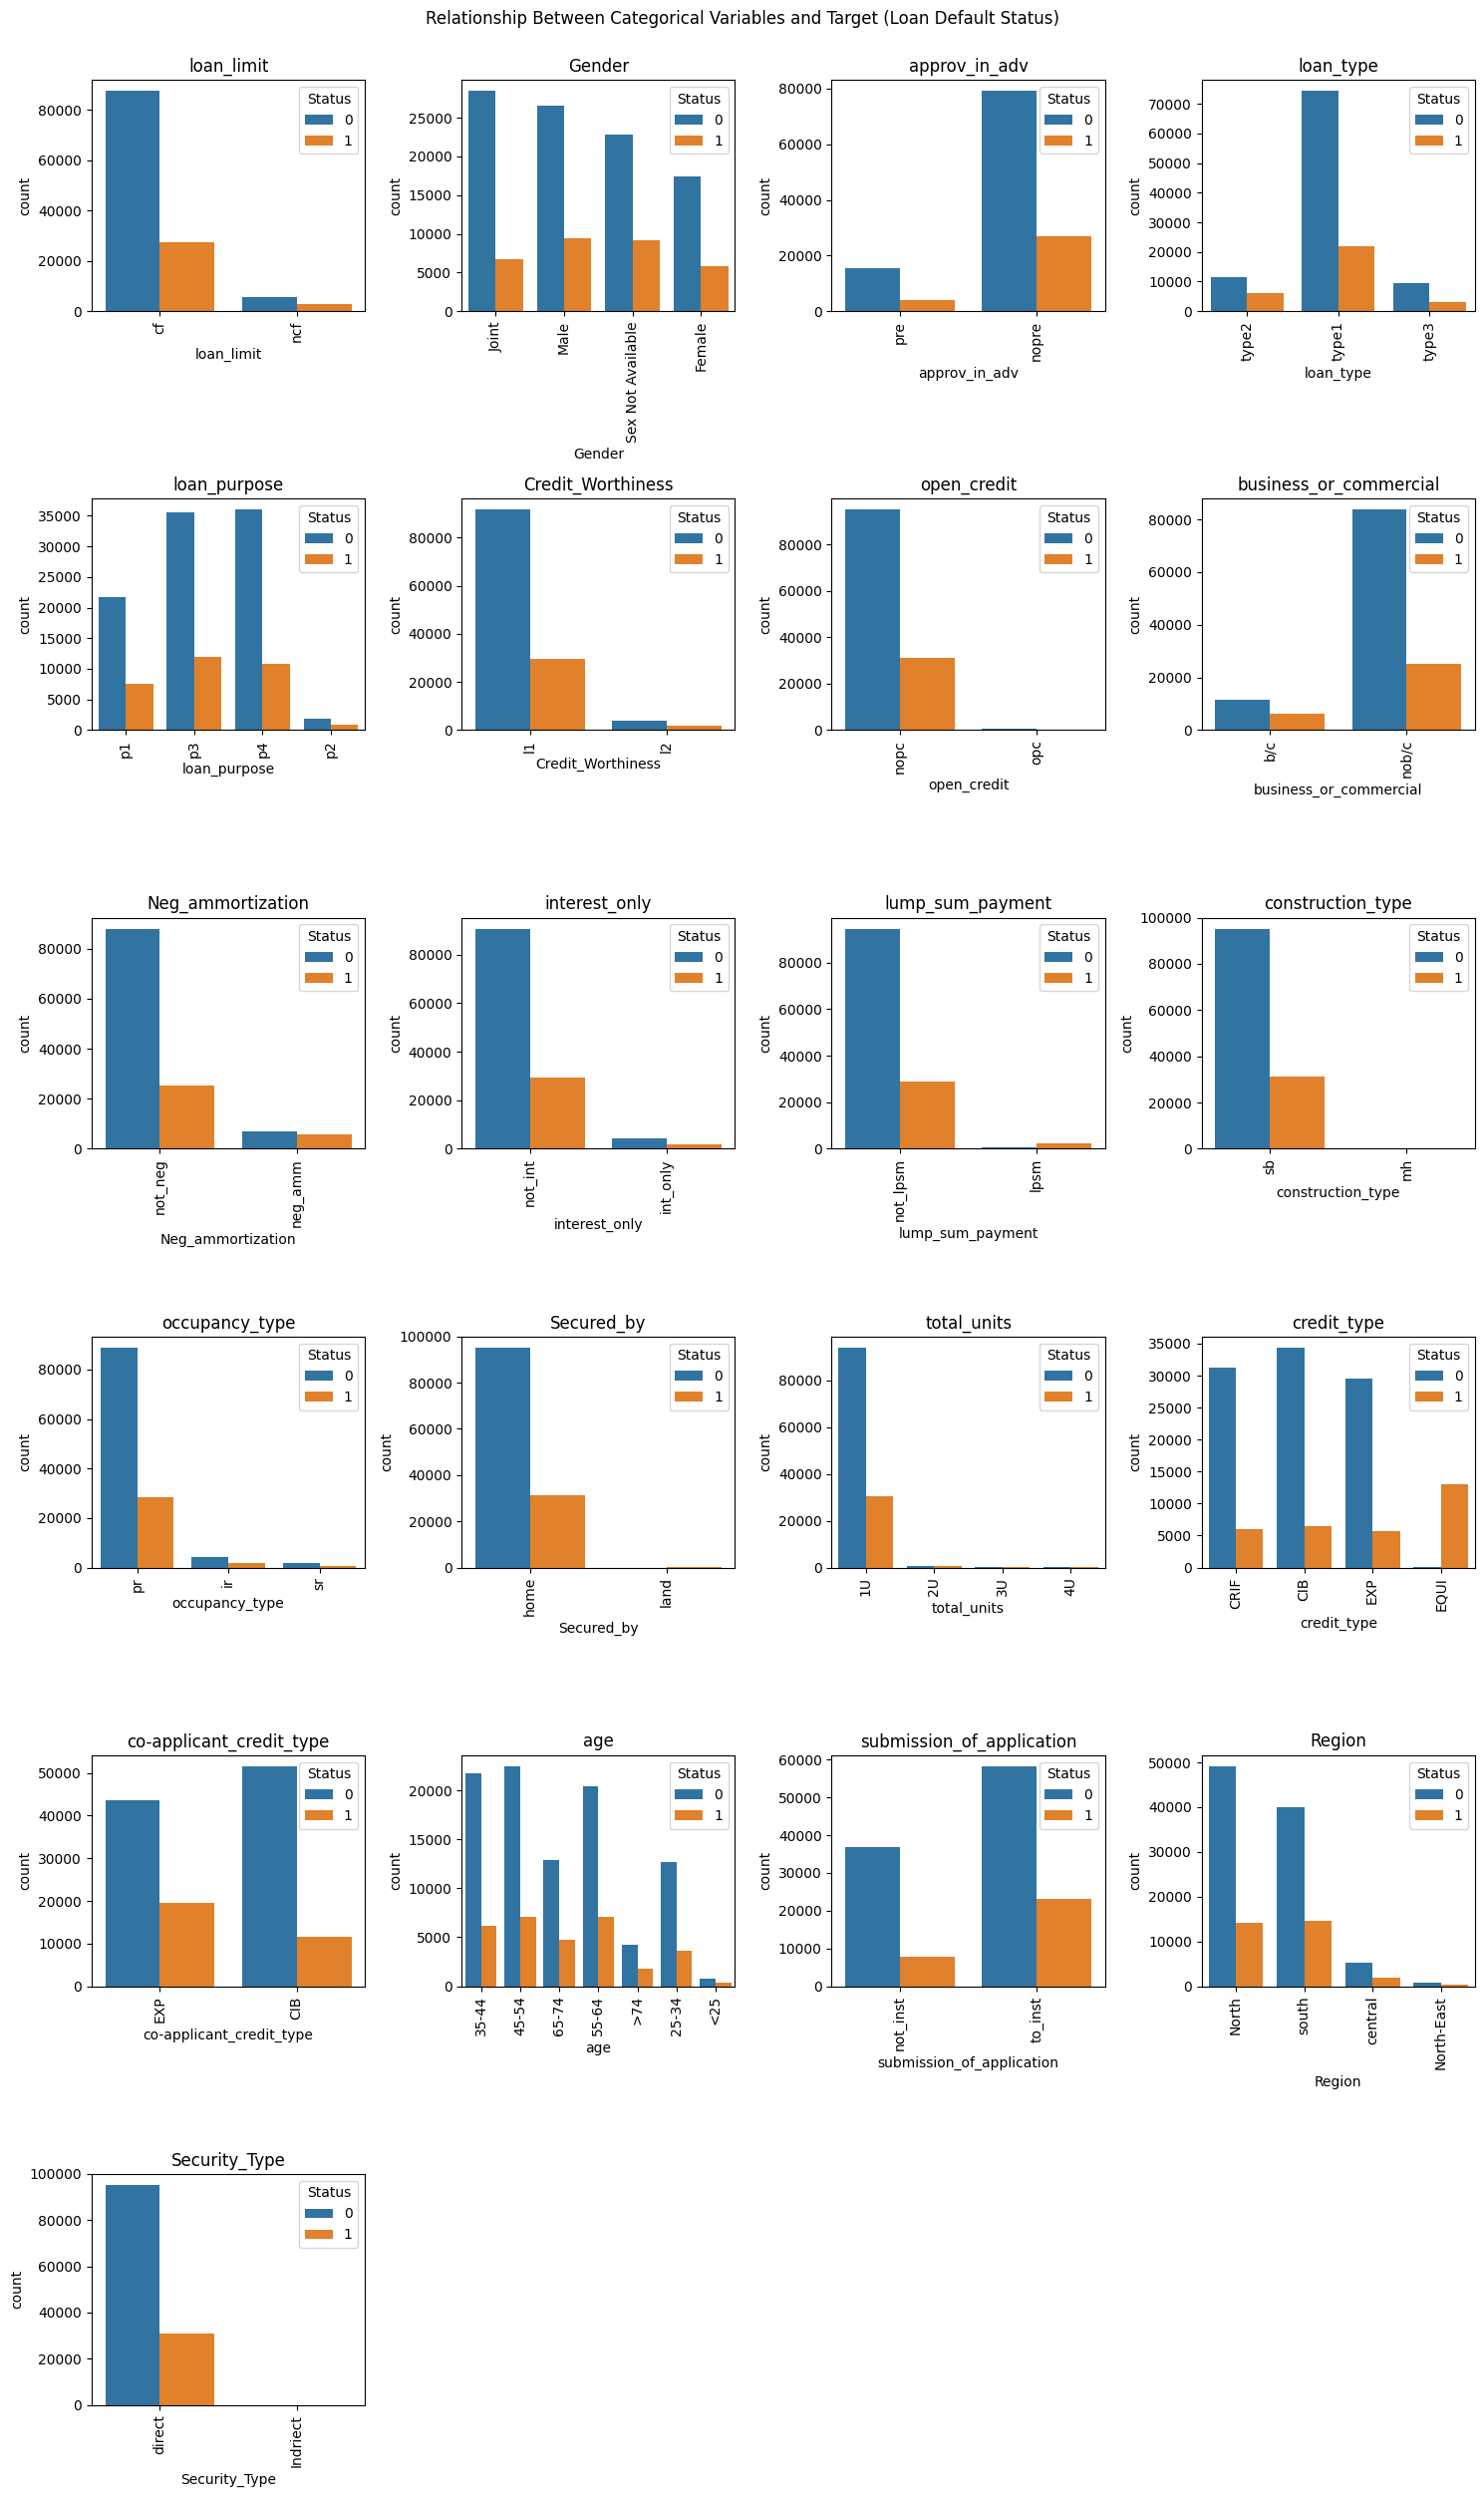

In [30]:
# Visualization of Relationship Between Categorical Variables and Status

plt.figure(figsize=(15, 25))
for i, col in enumerate(cat_cols, 1):

    plt.subplot(6,4, i)
    sns.countplot(data=data, x=col, hue='Status')
    plt.title(col)
    plt.xticks(rotation=90)
plt.suptitle("Relationship Between Categorical Variables and Target (Loan Default Status)", y=1)   
plt.tight_layout()
plt.show()


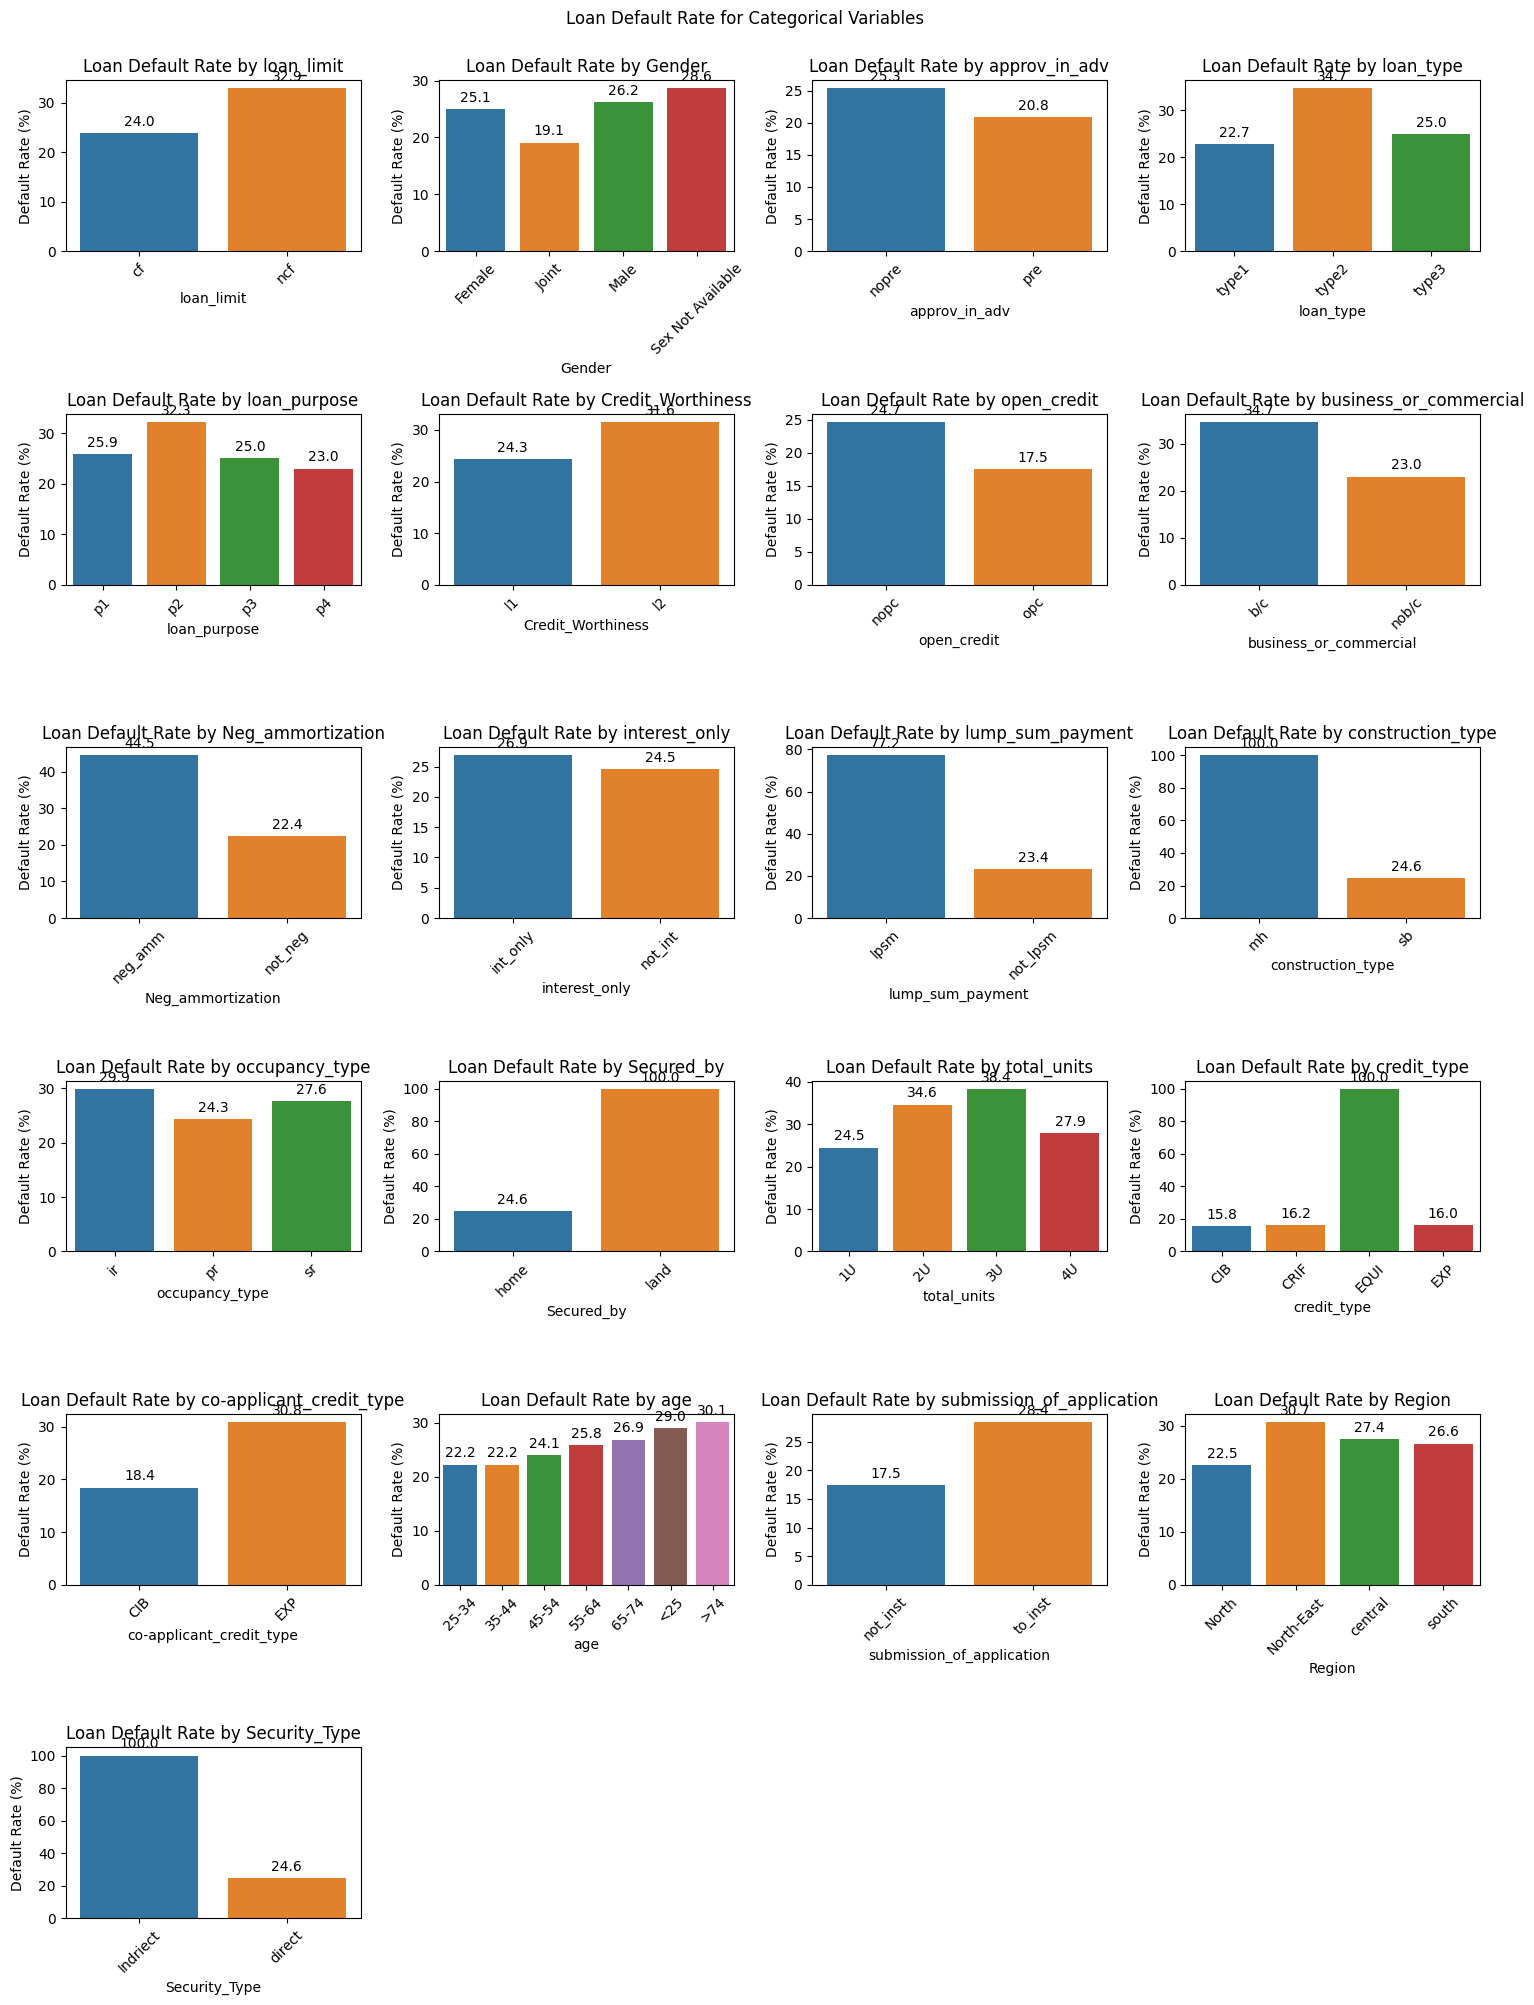

In [31]:
# Visualizing loan default rates across various categorical variables

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    
    default_rate = data.groupby(col)['Status'].mean() * 100
    plt.subplot(6,4, i)
    ax = sns.barplot(x = default_rate.index, y = default_rate.values)
    ax.bar_label(ax.containers[0], fmt='%.1f', padding=3)
    plt.title(f"Loan Default Rate by {col}")
    plt.ylabel("Default Rate (%)")
    plt.xticks(rotation=45)
plt.suptitle("Loan Default Rate for Categorical Variables", y=1)   
plt.tight_layout()
plt.show()

### Analysis

#### 1. `Loan Limit`

The Loan Limit column comprises two main categories:

- `cf` (Credit Facility): The majority of loans fall under this category.
- `ncf` (Non-Credit Facility): A smaller subset of loans, but with a significantly higher default rate compared to cf.

The high default rate of ncf category loans may be themselves riskier, or are extended to higher risk borrowers.

Approximately 2.2% of entries in the Loan Limit column are missing.


#### 2. `Gender`

The `Gender` column in this dataset has four distinct values: Male, Female, Joint, and Sex Not Available. 
Most applicants belong to the `Male` class. The least number of applicants belong to the `Female` class. Also, there is a major portion of borrowers, where there are muliple applicants in each loan application (`Joint`).

We observe that a major portion (~25%) of the entries fall under `Sex Not Available`, which represents missing or unrecorded gender information. The dataset's missing values are shown as this. 

Therefore, we have to apply some special imputation strategy to handle the data in the `Sex Not Available` column. <a href='#Sex_imputation'>(See Missing Value Handling)</a> 


#### 3. Pre-approved Loans

The approv_in_adv column captures whether a loan was pre-approved or not pre-approved.

The majority of loans are not pre-approved.

The default rates between pre-approved (21%) and non-pre-approved (25%) loans are relatively close, indicating that pre-approval does not significantly reduce the likelihood of default.

About 779 datapoints in the `approv_in_adv` column are missing that constitues of about 0.61% of the loans.


#### 4. Loan Type

The loan_type column categorizes loans into three types: type_1, type_2, and type_3.

The majority of loans fall under type_1, indicating it’s the most common category in the dataset. Both type_2 and type_3 loans are significantly underrepresented in comparison to type_1.

Analysis shows that type_2 loans have a noticeably higher default rate compared to type_3 and type_1 loans.

It is possible that type_2 loans have conditions associated with higher risk, such as higher loan amounts, lower income levels, or other structural aspects that increase default probability.

The dataset is complete on this varible (no missing values).

<a id = 'loan_purpose'></a>






#### 5. Loan Purpose

The loan_purpose feature categorizes loans into four distinct purposes, labeled as p1, p2, p3, and p4.

`p1` is the most common loan purpose, making up a significant portion of the dataset. The loan purpose `p2` has a relatively low representation in the dataset compared to other purposes.

The purpose `p2` shows the highest default rate among them. This suggests that loans taken out for this purpose may pose a greater risk. The low number of loan sanctioned for this purpose is also meanigful, given its high risk.

This higher default rate's significance to be tested, as the number of loans categorized under this purpose is much lower than the other purposes. 

<a href='#9.6'>Chi-Square Test for Independence</a>

A chi-square test was performed to assess whether the association between loan_purpose and Status is statistically significant. The p-value of `4.09e-39` (extremely low), which strongly suggests a statistically significant association between loan purpose and default status.

#### 6. Credit Worthiness

This columns shows the two categories of borrowers: 
- `l1` for low risk
- `l2` for high risk

The data shows that high-risk borrowers (l2) indeed have a higher likelihood of default, reflecting real-world trends where high-risk credit assessments correlate with increased default rates. This feature is valuable for our model, as it provides clear risk segmentation that aligns with default probability.


#### 7. Business or Non-business

This column distinguishes whether a loan is for business purpose or non-business purpose (personal).

The dataset contains a higher proportion of personal loans compared to business loans. This indicates that personal loans are more commonly issued than business loans within the observed population. 

Despite the lower number of business loans, they exhibit a higher default rate compared to personal loans. This suggests that businesses may face more challenges in meeting loan obligations.


#### 8. Negative Amortization

It refers to a situation in which the monthly payments made on a loan are not sufficient to cover the interest accruing on that loan. As a result, the unpaid interest is added to the loan balance, causing the amount owed to increase over time rather than decrease.

So number of loans with Negative Amortization holds more risk and higher default rates. As our dataset itsef has ~75% of non-defaulters, the number of negative_ammortization markings are less in it.

There are a few missing values, which would be handled later.

#### 9. Interest Only Loans

 An interest-only loan allows the borrower to pay only the interest on the loan for a specified period, after which the borrower must start paying back the principal along with interest.
 
In our dataset, the number of loans categorized as interest-only is significantly lower than those requiring both principal and interest payments. Interestingly, default rate is almost similar in both types.





<a id='lumpsum_eda'></a>

#### 10. Lumpsum Payment

The analysis reveals a notable difference in the default rates between borrowers who made lumpsum payments and those who did not. Specifically, the rate of default among borrowers who opted for lumpsum payments is nearly three times higher than that of those who did not.

However, it's important to consider that the number of borrowers making lumpsum payments is relatively small. This raises a significant point: it’s possible that many of these borrowers were in default at the time of making their lumpsum payments. Therefore, they may have chosen to settle their loans in full rather than continue with regular EMI payments. So, a probable data leakage may be doubted for this field.

This pattern suggests that the lumpsum payment option may not be indicative of borrower strength but rather a last-resort measure for those unable to sustain their loan obligations.

#### 11. construction_type

99.9% of the construction type column values belong to `sb` (site built). Only a little number of constructions are `mh` manufactured houses. 

The above trend might show that, in our sample region, almost all of the customers tend to build a house or go with the traditional residence structure rather than buying pre-manufactured houses.

Given the lack of representation for manufactured homes, this variable may not serve as a significant predictor in the loan default model. If nearly all observations are of one category, the model might not gain meaningful insights from it.


#### 12. Construction Type ,  Secured By and Security Type

In the dataset, all entries classified under the construction_type of 'mh' (manufactured houses) are secured by land. This indicates that manufactured houses are likely treated differently from site-built homes in terms of securing loans, with a specific focus on land as collateral. These datapoints also has the Security_Type `indirect`.

As there are only 0.02% of values belong to `land` or `mh` or `Indirect`, these variable will not be a good predictor for our model.

You can visit the detailed <a href='#9.7'> grouped data showing this trend</a> in the appendix.

#### 13. Occupancy Type

Our dataset consists of 3 types of occupancies:

- PR (Primary Residence) -> Main home of the owner
- SR (Secondary Residence) -> Second home, used as a vacation home or similar.
- IR (Investment Residence) -> Home as an real-estate investment,or for renting out.

Most borrowers have occupancy type 'PR', which shows a usual trend.
Number of secondary residence owners are far less, as it might be limited to the upper class of the society.
The number of `ir` houses are in between the above two, but possess a larger rate of default, showing the high risk of getting back the investment through resale, or by the rental income.


#### 14. total_units

The total_units column categorizes properties into four groups: 1U, 2U, 3U, and 4U, which represent the number of living units in the property.

The majority of properties are 1U (single-unit), which is the most frequent value in the dataset. This suggests that the dataset is skewed towards single-family homes or individual residential units.

The default rate is 24%, which is the lowest among all categories. This aligns with the general assumption that single-family homes may pose less financial risk.The highest default rate is observed here at 38.4%. This could indicate higher risk for this property type, potentially due to the complexity of managing more tenants and expenses.

Since the dataset is heavily skewed toward 1U properties, it's possible that the trends for multi-unit properties are less reliable due to smaller sample sizes.
 
#### 15. credit_type

This column represents the different credit bureausthat provided the credit score for the loan applicant. The categories include `CIB` (CIBIL), `CRIF`, `EXP` (Experian), and `EQUI` (Equifax).

The `EQUI` has the lowest number of datapoints, but 99% of those are loan defaulters, which is an outlier, while others have only around 16% of loan default rates.

It is possible that there was a systematic issue with loans related to Equifax credit scores, or the data is incorrect.


#### 16. Co-Applicant Credit Type

This column represents the credit bureau information for co-applicants of loans. There are 2 credit bureaus is this data: `CIB` and `EXP`.

The counts of both types are fairly similar, suggesting both agencies are used frequently to assess co-applicants' creditworthiness.

The default rate is higher for loans where the co-applicant’s credit type is from EXP (30.9%) compared to CIB (18.4%).

This suggests that borrowers whose co-applicants have their credit information sourced from Experian might be at higher risk of default, which could hint at potential differences in how the two bureaus assess creditworthiness, or that applicants with Experian reports might represent a slightly riskier demographic in this context.

#### 17. age

The age distribution shows that the majority of borrowers fall within the 35 to 64 years age range. This group tends to have more stable financial situations, may be due to potentially higher incomes.

The youngest group (<25 years) and oldest (>74 years) are relatively few. These age groups also possess highest risks, suggesting financial instability in these groups.

The age of borrowers seems to be playing a significant role in predicting loan defaults.

#### 18. submission_of_application

The Submission of Application column indicates whether the loan application was submitted directly to the institution or through another channel.

Most of the people applied directly to the institution, but this group possess higher default rate of 28% also.

The other group, who applied not directly is about half of the number, who did it directly. This group has 17% default rate. 

This could suggest that loans applied through intermediaries may be filtered more rigorously, or those applying through the institution might represent higher-risk borrowers


#### 19. Region

The northern region has the highest number of applicants - 74,722, while north-east region is the smallest group with only 1235 borrowers. The south region has 64,016 borrowers and the central region has 8697 borrowers.

The lower number of applicants in North-East and Central regions may also be the part of lower economic activities in these regions.

North has the largest number of borrowers but also the lowest default rate, suggesting stronger economic conditions or more responsible borrowing patterns in that region.

North-East, despite having the fewest borrowers, has the highest default rate, indicating possible financial difficulties or higher risk profiles in that region. 

<a id='Cleaning'></a>

# 3. Data Cleaning & Pre-processing

## 3.1 Checking for missing values

### 3.1.1 Missing values for categorical columns

In [32]:
data[cat_cols].isnull().sum().sort_values(ascending = False)

loan_limit                   2860
approv_in_adv                 779
submission_of_application     163
age                           163
loan_purpose                  119
Neg_ammortization             102
occupancy_type                  0
Region                          0
co-applicant_credit_type        0
credit_type                     0
total_units                     0
Secured_by                      0
lump_sum_payment                0
construction_type               0
Gender                          0
interest_only                   0
business_or_commercial          0
open_credit                     0
Credit_Worthiness               0
loan_type                       0
Security_Type                   0
dtype: int64

#### Key Observations


- There are 4186 missing values in the categorical columns of our dataset.
- Six categorical variables are missing values.
- The `loan_limit` column has the most number of missing values shown as NaN.
- From EDA, we found that the missing values in `Gender` column is shown as a category of `Sex_not_available`.


#### 1. Categorical Missing Value Handling - `loan_limit`

To address missing values in the `loan_limit` variable, we began by analyzing its distribution and investigating potential relationships with other features to guide imputation. The loan_limit column has two categories:

- `cf` - 115,061 instances (most frequent category)
- `ncf` - 8,448 instances

Given the distribution skewed heavily toward cf, we conducted a cross-tabulation with other variables, such as `business_or_commercial`, to identify any patterns that could inform imputation. Cross-tabulation results showed no clear association that would reliably inform an imputation strategy for missing values.

We also visualized `loan_limit` against `business_or_commercial` and `credit_type` to assess any potential correlations; however, no significant patterns were observed to guide a custom imputation method. Therefore, we opted to __fill missing values with the most frequent category__, `cf`.



In [33]:
data.loan_limit.value_counts()

loan_limit
cf     115061
ncf      8448
Name: count, dtype: int64

In [34]:
crosstab_loan_purpose = pd.crosstab(data['loan_limit'], data['business_or_commercial'], margins=True, margins_name="Total")
print(crosstab_loan_purpose)

business_or_commercial    b/c   nob/c   Total
loan_limit                                   
cf                      16287   98774  115061
ncf                       928    7520    8448
Total                   17215  106294  123509


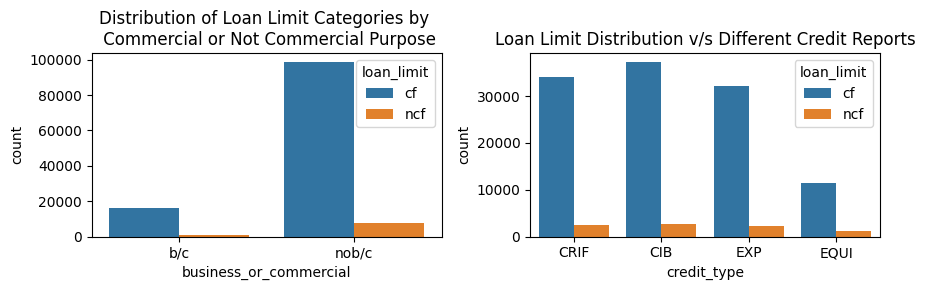

In [35]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.countplot(data=data, x = 'business_or_commercial', hue = 'loan_limit')
plt.title("Distribution of Loan Limit Categories by \n Commercial or Not Commercial Purpose")
plt.subplot(1,2,2)
sns.countplot(data=data, x='credit_type', hue='loan_limit')
plt.title("Loan Limit Distribution v/s Different Credit Reports")
plt.tight_layout()
plt.show()

#### 2. Categorical Missing Value Handling - `approv_in_adv`

To address missing values in the `approv_in_adv` variable, we analyzed its distribution and examined possible relationships with other variables to inform an appropriate imputation strategy.

The` approv_in_adv` column has two categories:

- `nopre`: 105,947 instances (most frequent category)
- `pre`: 19,643 instances

Given the distribution, we explored whether a relationship exists between approv_in_adv and other features to inform a custom imputation.

In [36]:
data.approv_in_adv.value_counts()

approv_in_adv
nopre    105947
pre       19643
Name: count, dtype: int64

__a. Relationship with Credit_Worthiness__

- __Hypothesis__: Loans pre-approved might correlate with better creditworthiness (lower risk).
- __Analysis__: A cross-tabulation of` approv_in_adv` with `Credit_Worthiness` showed no strong dependency between these variables

In [37]:
crosstab_loan_purpose = pd.crosstab(data['approv_in_adv'], data['Credit_Worthiness'], margins=True, margins_name="Total")
print(crosstab_loan_purpose)

Credit_Worthiness      l1    l2   Total
approv_in_adv                          
nopre              100763  5184  105947
pre                 19371   272   19643
Total              120134  5456  125590


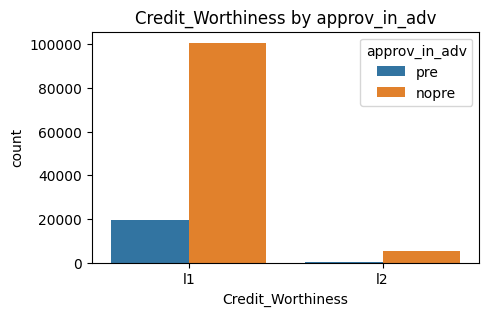

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='Credit_Worthiness', hue='approv_in_adv')
plt.title("Credit_Worthiness by approv_in_adv")
plt.show()

__b. Relationship with `Upfront_charges`__

- __Hypothesis__: Pre-approved loans may have lower upfront charges.
- __Analysis__: We segmented `Upfront_charges` into deciles to check if charge levels varied significantly with `approv_in_adv` categories. With the total counts remaining similar across charge ranges, there’s no clear trend where higher or lower upfront charges correlate strongly with pre-approval status.

In [39]:
# Missing values in Upfront charges imputed with median

X = data.copy()
median_upc = X['Upfront_charges'].median()
X['Upfront_charges'].fillna(median_upc, inplace=True)

Upfront_charges_bucket  (-0.001, 795.0]  (795.0, 1810.328]  \
approv_in_adv                                                
nopre                             21855              10127   
pre                                3615               2108   
Total                             25470              12235   

Upfront_charges_bucket  (1810.328, 2592.455]  (2592.455, 3302.218]  \
approv_in_adv                                                        
nopre                                  35899                  6862   
pre                                     5963                  1496   
Total                                  41862                  8358   

Upfront_charges_bucket  (3302.218, 4550.0]  (4550.0, 6457.26]  \
approv_in_adv                                                   
nopre                                10365              10462   
pre                                   2219               2057   
Total                                12584              12519   

Upfront_char

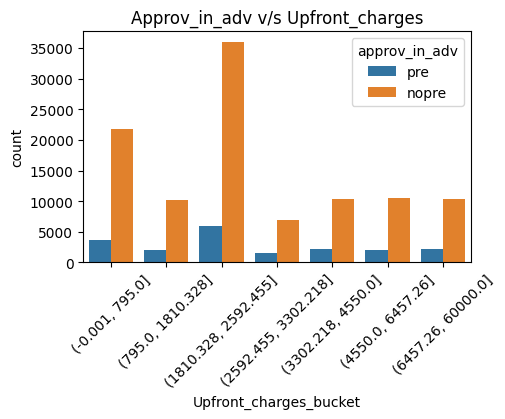

In [40]:
X['Upfront_charges_bucket'] = pd.qcut(X['Upfront_charges'], q=10, duplicates = 'drop')

print(pd.crosstab(X['approv_in_adv'], X['Upfront_charges_bucket'], margins=True, margins_name="Total"))

plt.figure(figsize=(5,3))
sns.countplot(data=X, x='Upfront_charges_bucket', hue='approv_in_adv')
plt.title("Approv_in_adv v/s Upfront_charges")
plt.xticks(rotation = 45)
plt.show()

__c. Relationship with Income__

- __Hypothesis__: Higher income levels may influence the likelihood of pre-approval.
- __Analysis__: Cross-tabulation and visualization of `approv_in_adv` by `Income_Bin` revealed no significant relationship between income level and pre-approval status.

Income_Bin        Q1     Q2     Q3     Q4   Total
approv_in_adv                                    
nopre          24916  24949  24311  24759   98935
pre             4909   4902   4654   4397   18862
Total          29825  29851  28965  29156  117797


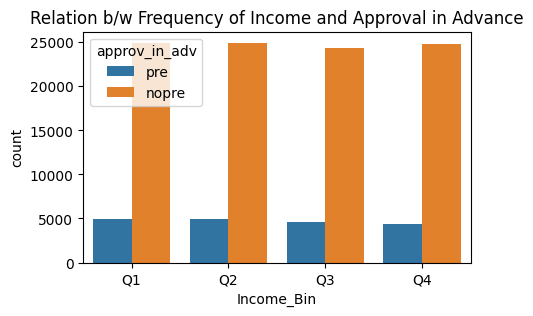

In [41]:
print(pd.crosstab(data['approv_in_adv'], data['Income_Bin'], margins=True, margins_name="Total"))

plt.figure(figsize = (5,3))
sns.countplot(data=data, x='Income_Bin', hue='approv_in_adv')
plt.title("Relation b/w Frequency of Income and Approval in Advance")
plt.show()

__Imputation Decision__

Since no clear relationships were identified between `approv_in_adv` and other features, we chose to fill missing values with the mode, `nopre`.



In [42]:
cat_missing = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']

<a id='Sex_imputation'></a>

#### 3. Special Case - Handling Missing Values in Gender Column

Upon examining the Gender column, we identified that missing values were represented as "`Sex Not Available`". Such values constitues about 25% of the instances of our data. Therefore, we decided to analyse it closely. Our analysis revealed some notable trends:

Gender      Female  Joint   Male  Sex Not Available   Total
Region                                                     
North        15297  23374  24243                537   63451
North-East     333    185    529                 16    1063
central       2097   3130   2097                 63    7387
south         5473   8484   9090              31421   54468
Total        23200  35173  35959              32037  126369


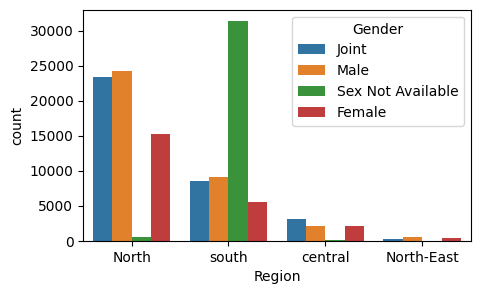

In [43]:
gender_region = pd.crosstab(data['Region'], data['Gender'], margins=True, margins_name="Total")
print(gender_region)

plt.figure(figsize = (5,3))
sns.countplot(data=data, x='Region', hue='Gender')
plt.show()

- The `south` region had a significantly high percentage (approximately 57.7%) of entries marked as `Sex Not Available`.

- In contrast, other regions had relatively low proportions of `Sex Not Available`, with consistent `Male`, `Female`, and `Joint` applicant ratios.

This disparity means that imputing these values with a single mode would not represent the actual diversity found in other regions. Additionally, since gender could potentially impact loan approval trends, preserving an accurate distribution is crucial for reliable modeling.

To handle these `Sex Not Available` values without introducing bias, we applied a __probabilistic imputation__ approach. This approach leverages the observed gender distribution from other regions, where gender data is more complete and consistent, ensuring that imputed values reflect a realistic mix of gender categories across the dataset.

The detailed strategy is shown in the <a href='#9.8'>appendix.</a>

Implementing a custom transformer for pipeline, to use probabilitic imputation to `Sex Not Available` values. As shown before, we do not use `Gender` values with `Sex Not Available` and `South` region for calculating the probabilities.

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin


class ProbabilisticImputer(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_region=None, columns = None):
        self.exclude_region = exclude_region
        self.probabilities = {}
        self.columns = columns

    def fit(self, X, y=None):
        # If X is a DataFrame, store the columns
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        # Convert X to DataFrame (after setting the column names)
        
        df = X[(X['Region'] != self.exclude_region) & (X['Gender'] != "Sex Not Available")]

        # Calculating gender probabilities
        gender_counts = df['Gender'].value_counts(normalize=True)
        self.probabilities = gender_counts.to_dict()
        return self

    def transform(self, X):
        # If X is a NumPy array, convert it to DataFrame using stored column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        X_copy = X.copy()

        # Replace 'Sex Not Available' with probabilistic values based on the earlier caluclated probabilities
        for i, row in X_copy.iterrows():
            if row['Gender'] == 'Sex Not Available':
                X_copy.at[i, 'Gender'] = np.random.choice(list(self.probabilities.keys()),
                                                          p=list(self.probabilities.values()))

        return X_copy


### Missing Value Handling - Categorical Column Conclusion

After a thorough analysis of categorical columns with missing values, we determined that imputing with the most frequent class is the most reliable approach for maintaining data consistency. Columns with the highest missing values, such as `loan_limit` and `approv_in_adv`, were found to lack strong correlations with other features, justifying mode imputation for these columns.

For other categorical variables with fewer missing values, including `loan_purpose`, `Neg_ammortization`, `age`, and `submission_of_application`, we similarly applied mode imputation. This method preserves the original data distribution without introducing substantial bias.

__Special Handling for `Gender` Column__: The Gender column includes non-missing placeholders ("Sex Not Available") to denote unavailable data. To address these instances more accurately, we plan to apply a probabilistic imputation technique via a custom transformer, providing a more efficient handling of missing gender data based on observed distribution patterns.

This imputation strategy across categorical columns ensures robust data preparation, enhancing the dataset's suitability for modeling without sacrificing interpretability.

### 3.1.2 Missing Values Handling for Numerical Columns

Our dataset contains several numerical columns with varying degrees of missing value.

For each column, we evaluated the appropriate imputation strategy based on the nature of the data, potential correlations, and the extent of missing values.

In [45]:
data[num_cols].isnull().sum()

loan_amount                 0
rate_of_interest        30967
Interest_rate_spread    31130
Upfront_charges         33723
term                       33
property_value          12829
income                   7817
Credit_Score                0
LTV                     12829
dtir1                   20540
dtype: int64

Given the substantial non availability of data in several numerical columns, we analyzed the distribution of these columns to determine the most appropriate imputation strategy.

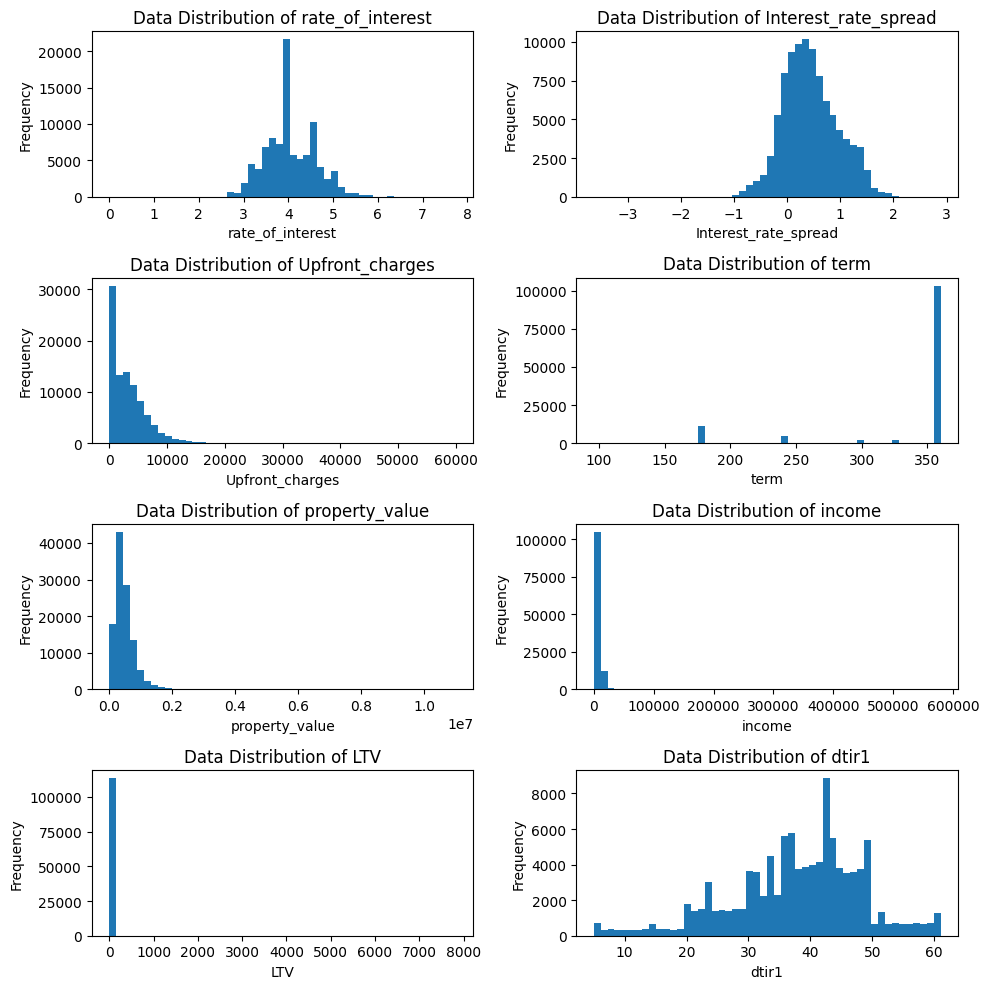

In [46]:
# Numerical cols with missing values

num_missing = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
                  'property_value', 'income', 'LTV', 'dtir1']


# Creating histograms of numerical columns with missing data
fig, axes = plt.subplots(4,2, figsize = (10,10))
axes = axes.flatten()


for i, col in enumerate(num_missing):
    axes[i].hist(data[col], bins=50)
    axes[i].set_title(f"Data Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()    


#### Strategy

- __Skewed Data__: For columns that exhibit skewness, such as `propery_value`, `Upfront_charges`, `income`, `term` and `LTV` we will utilize the __median__ as the imputation strategy. The median is less affected by outliers and provides a better central tendency representation for skewed distributions.

- __Non-Skewed Data__: In contrast, the `Interest_rate_spread`, `rate_of_interest` and `dtir1` appear to have a more normal distribution, where the values of the mean and median are likely to be similar. However, to ensure consistency across the imputation strategy, we will also impute missing values in these columns using the median.



### Missing Value Handling - Numerical Column Conclusion

- __Median__ values of each numerical column will be used to impute the missing values in each.

- __Implementation__: We will employ the `SimpleImputer` from Scikit-learn with the strategy set to median, ensuring efficient handling of NaN values across the numeric columns.

## 3.2 Numerical Features - Standardization

Scaling of numerical data is important, particularly when using models sensitive to the scales of the training data.

### Standardization with Standard Scaler

For the initial modeling phase, we will use the `Standard Scaler` to standardize our numerical features. This process involves centering the data around the mean and scaling it by its standard deviation. Standardization is essential for our baseline model, Logistic Regression, as it performs optimally when the input features are on a similar scale.

$$ z = \frac{X - \mu }{\sigma }$$


where, 

$X = original value$

$\mu = mean$

$\sigma = standard deviation$

#### Future Scaling for Deep Learning

When we transition to Deep Learning models later in the project, we will shift to using the `MinMax Scaler`. This scaler transforms the features to a fixed range, typically [0, 1], which can improve convergence rates in neural networks.


#### Considerations for Random Forest Classifier

For the Random Forest Classifier, scaling is not a prerequisite. Random Forest is a tree-based ensemble model that is inherently robust to the scale of features. It effectively handles skewed data through its mechanism of averaging predictions from multiple decision trees, allowing it to maintain performance without the need for standardization.

## 3.3 Categorical Features - Encoding

Our dataset contains 21 categorical features, all of which are non-ordinal. To effectively incorporate these features into our machine learning models, we will employ One-Hot Encoding. This encoding technique allows us to convert categorical variables into a format that can be provided to machine learning algorithms, ensuring that no ordinal relationship is assumed among the categories.

#### One-Hot Encoding

- One-Hot Encoding transforms each categorical feature into a set of binary (0 or 1) columns. Each category is represented as a separate column, where a value of 1 indicates the presence of that category and a value of 0 indicates its absence.

#### Implementation

To implement One-Hot Encoding, we will utilize the `OneHotEncoder` from Scikit-Learn. This encoder will process our categorical features, and we will ensure that it is applied appropriately during the data preprocessing pipeline. The `handle_unknown='ignore'` parameter will ensure that if the encoder encounters a category during transformation that was not present during fitting, it will simply ignore it rather than raising an error.

<a id='Feature Selection'></a>


# 4. Feature Selection

Now, we will select the features for our model, which we would infer to be a part of the prediction. 

For selecting the features, we use Pearson Correlation Coefficients for numerical features, and Chi-Square test of categorical variables. Thereafter, we will calculate the Mutual Information Scores. By analyising these results, we will then select a baseline set of features, which will be used to train our model. In the evaluation phase of the model, the refinement of feature selection is also planned.

First of all, we need to handle the missing values, and one-hot encode the categorical variables as we discussed above.

In [47]:
from sklearn.impute import SimpleImputer

cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

num_cols.remove('ID'),
num_cols.remove('year') # We remove the 'year' as our data corresponds to only one year
num_cols.remove('Status')


X = data.copy()
y = X.pop("Status")

In [48]:
imputer = SimpleImputer(strategy = 'median')
X[num_cols] = imputer.fit_transform(X[num_cols])
X[num_cols] = pd.DataFrame(X[num_cols], columns = num_cols)

cat_imputer = SimpleImputer(strategy = 'most_frequent')

X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
X[cat_cols] = pd.DataFrame(X[cat_cols], columns = cat_cols)

X = pd.concat([X[num_cols],X[cat_cols]], axis = 1)

In [49]:
X.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Income_Bin',
       'dtir1_bins'],
      dtype='object')

## 4.1 Pearson Correlation Coefficients for Numerical Features

To understand the relationships between numerical features and their potential predictive power, we computed Pearson correlation coefficients for all numerical attributes in the dataset. Pearson correlation assesses the linear relationship between two continuous variables, with values ranging from -1 to +1.

- Most features show relatively low correlation coefficients with the target variable, suggesting weak linear relationships.
- Most features have p-values close to 0, making these correlations statistically significant even though the correlations are weak. The exemptions are `term` and `Credit_Score`.

In [50]:
from scipy import stats

num_df = X[num_cols]
pearson_dic = {i: stats.pearsonr(num_df[i], data['Status']) for i in num_df.columns}
pd.DataFrame(pearson_dic, index = ['Pearson Statistic', 'p-value']).T.sort_values(by='Pearson Statistic', ascending = False)


Pearson Statistic        p-value
dtir1                          0.082471  1.459162e-189
LTV                            0.040451   6.387586e-47
Credit_Score                   0.004805   8.762018e-02
term                           0.000564   8.412163e-01
loan_amount                   -0.034957   1.791001e-35
rate_of_interest              -0.046869   2.165482e-62
Interest_rate_spread          -0.049948   1.284670e-70
income                        -0.059442   2.815224e-99
property_value                -0.083151  1.121187e-192
Upfront_charges               -0.095003  3.860230e-251

### Chi-Square test of Categorical Variables

The Chi-Square test is a statistical method used to determine whether there is a significant association between two categorical variables. It helps assess how likely it is that an observed distribution is due to chance.

A low p-value suggests a statistically significant relationship with the target variable.

Now we will do Chi-Square test on categorical variables to check whether there's a statistically significant relationship between the categorical variables and loan default `Status`.

In [51]:
# Function to perform Chi-Square test
def chi_square_test(cat_var, target_var):
    # Create a contingency table
    contingency_table = pd.crosstab(data[cat_var], data[target_var])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return chi2, p, contingency_table


chi_square_results = []


for col in cat_cols:
    chi2, p, contingency_table = chi_square_test(col, 'Status')
    chi_square_results.append({
        'Variable': col,
        'Chi2 Statistic': chi2,
        'P-Value': p,
        'Contingency Table': contingency_table
    })


chi_square_results_df = pd.DataFrame(chi_square_results)


chi_square_results_df.sort_values(by='Chi2 Statistic', ascending = False)

Variable  Chi2 Statistic        P-Value  \
15                credit_type    44294.406668   0.000000e+00   
22                 dtir1_bins     5338.510899   0.000000e+00   
10           lump_sum_payment     4401.440988   0.000000e+00   
8           Neg_ammortization     3008.534609   0.000000e+00   
16   co-applicant_credit_type     2618.858942   0.000000e+00   
21                 Income_Bin     2356.802322   0.000000e+00   
18  submission_of_application     1873.463597   0.000000e+00   
3                   loan_type     1140.939605  1.770568e-248   
7      business_or_commercial     1109.239953  3.240719e-243   
1                      Gender      903.943988  1.234661e-195   
0                  loan_limit      340.021430   6.312530e-76   
19                     Region      324.340889   5.358518e-70   
17                        age      320.533867   3.243639e-66   
4                loan_purpose      181.543978   4.092887e-39   
2               approv_in_adv      179.321342   6.817110e-41   
5           Credit_Worthiness      147.343706   6.600792e-34   
12             occupancy_type      113.976388   1.779680e-25   
14                total_units      105.692181   9.273599e-23   
13                 Secured_by       87.788213   7.285179e-21   
20              Security_Type       87.788213   7.285179e-21   
11          construction_type       87.788213   7.285179e-21   
9               interest_only       16.940127   3.857742e-05   
6                 open_credit       13.072976   2.995867e-04   

                                    Contingency Table  
15  Status           0      1
credit_type         ...  
22  Status          0     1
dtir1_bins            ...  
10  Status                0      1
lump_sum_paymen...  
8   Status                 0      1
Neg_ammortizat...  
16  Status                        0      1
co-appl...  
21  Status          0      1
Income_Bin           ...  
18  Status                         0      1
submis...  
3   Status         0      1
loan_type             ...  
7   Status                      0      1
business_...  
1   Status                 0     1
Gender         ...  
0   Status          0      1
loan_limit           ...  
19  Status          0      1
Region               ...  
17  Status      0     1
age                
25-34 ...  
4   Status            0      1
loan_purpose       ...  
2   Status             0      1
approv_in_adv     ...  
5   Status                 0      1
Credit_Worthin...  
12  Status              0      1
occupancy_type   ...  
14  Status           0      1
total_units         ...  
13  Status          0      1
Secured_by           ...  
20  Status             0      1
Security_Type     ...  
11  Status                 0      1
construction_t...  
9   Status             0      1
interest_only     ...  
6   Status           0      1
open_credit         ...

- `credit_type` (Chi2: 44294.41, p-value: 0.000) and `dtir1_bins` (Chi2: 5338.51, p-value: 0.000) show the highest Chi-Square statistics, indicating a very strong relationship with loan status.

- Other variables such as `lump_sum_payment` (Chi2: 4401.44, p-value: 0.000), `Neg_ammortization` (Chi2: 3008.53, p-value: 0.000), and `co-applicant_credit_type` (Chi2: 2618.86, p-value: 0.000) also demonstrate significant associations.

- Lower Chi2 values are observed for `loan_limit` (Chi2: 340.02, p-value: 6.31e-76), `Region` (Chi2: 324.34, p-value: 5.36e-70), and `age` (Chi2: 320.53, p-value: 3.24e-66), indicating weaker but still statistically significant relationships.

- The p-values for most features are close to zero, indicating that these associations are unlikely to be due to chance.

### Mutual Information (for Categorical and Numerical Features)


Mutual information measures, how much each variable tells us about another. This dimensionless quantity can be interpreted as follows:

- High MI Score : A large reduction in uncertainity between two variables
- Low MI Score : Small reduction in uncertainity
- Zero MI Score : The variables are totally independent.


MI can also capture the non-linear relationship between variables.  

 By calculating MI between each feature and the target variable, `Status`, we can select the most informative features to include in the model.
 
 
- Using MI, we prioritize features that reduce the most uncertainty about the target variable, Status. This allows us to include only the most informative features, improving model interpretability and potentially enhancing prediction accuracy.

- Features with high and moderate MI scores will be prioritized in the model, while those with near-zero MI scores might be considered for exclusion unless they add other strategic insights (such as demographics or categorical balance).

In [52]:
from sklearn.feature_selection import mutual_info_classif

X = pd.get_dummies(X, drop_first=True)  

mi_scores = mutual_info_classif(X, y, discrete_features = 'auto')
mi_scores_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores_df)


Mutual Information Scores:
Interest_rate_spread                 0.558836
Upfront_charges                      0.477149
rate_of_interest                     0.350271
LTV                                  0.175676
credit_type_EQUI                     0.165125
property_value                       0.140020
dtir1                                0.084586
dtir1_bins_7                         0.032065
lump_sum_payment_not_lpsm            0.029161
Security_Type_direct                 0.028533
Neg_ammortization_not_neg            0.025248
submission_of_application_to_inst    0.024311
income                               0.023386
construction_type_sb                 0.022859
co-applicant_credit_type_EXP         0.021416
business_or_commercial_nob/c         0.019808
interest_only_not_int                0.018090
term                                 0.016214
credit_type_EXP                      0.013386
occupancy_type_pr                    0.012633
credit_type_CRIF                     0.011750
dtir1_b

- Interestingly, the variable `Interest_rate_spread` shows the highest mutual informaion score, despite of its low collinearity. But, we decided not to include `Interest_rate_spread` as per the insights from the <a href='#EDA Interest'> EDA</a>, so that we can avoid a potential data leakage risk.

- A similar observation is seen for <a href='#EDA Interest'>`rate_of_interest`</a> also.  Based on the insights, the inclusion of `rate_of_interest` as a predictive feature is questionable, as it lacks sufficient variability in default cases to provide meaningful information. This variable may be excluded from model training to prevent undue reliance on imputed values, though it may still offer value for understanding trends in non-default loans.

- The column `LTV`'s missing values also possess such imbalance, but not that much strong. Considering its predictive utility and importance in lending, `LTV` is included in the model training but will be monitored for bias due to missing values in default cases.

- Engineered features is not considered at the initial stage of this project. So engineered features like `dtir1_bins`, `Income_Bin`, etc. would be included at the next stage of this project.

### Upfront Charges - Investigation

For <a href='#EDA Upfront'>`Upfront_charges`</a> column also, the reliablitity was questionable. So, we conducted a model a comparison of performance of models, trained with and without this feature. 

In this investigation, we found that, the Logistic Regression model performed similarly with accuracy of 86%.

But for Random Forest Classifier, the model performance was considerably different. Without the feature, model shows a performance about 87%. But, when trained with this feature, it showed a nearly perfect fit with accuracy of 98%. The feature importance was about 0.49, where the second importanct feature had only about 11% importance.

When analysing this leap in performance with our EDA, we suspect a high chance of data leakage. This comparison of model performace is shown in the <a href='#9.9'>appendix.</a>

Therefore, in this project, we do not qualify this variable as feature for the model training dataset.

By analysing the above scores, we will select the baseline features for our model, as follows:

In [53]:
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']


cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
               'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
               'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
               'co-applicant_credit_type', 'Region']

features = num_features + cat_features


In [54]:
from sklearn.model_selection import train_test_split

X = data[features].copy()
y = data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

<a id='Model'></a>

# 5. Model Building & Evaluation

In this section, we will first build a baseline model using Logistic Regression, a linear model that is widely used for binary classification problems. We will evaluate its performance using several metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.

After analyzing the baseline model, we will decide whether it sufficiently captures the patterns in the data or if a more complex model, such as Random Forest, is necessary. If needed, we will build, tune, and calibrate other models to improve performance. The models will also be compared on their ability to generalize well to unseen data.

Evaluation will follow immediately after each model's training, and we will iteratively adjust our modeling approach based on the results.

### Evaluation Metrics

To assess the performance of our classification model, we will use the following evaluation metrics. Each metric provides a different perspective on the model's strengths and weaknesses.

#### 1. Accuracy

Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total instances in the dataset. This metric gives the idea of overall performance of the model.

#### 2. Confusion Matrix

A confusion matrix is a 2x2 table that summarizes the model's performance by showing the true positives, true negatives, false positives, and false negatives.

[True Negatives (TN, False Positives (FP)

False Negatives (FN), True Positives (TP)]



- True Positive (TP): The model correctly predicts the positive class (Status = 1)
- True Negative (TN): The model correctly predicts the negative class (Status = 0)
- False Positive (FP): The model incorrectly predicts the positive class -__Type I Error__ (Actual Status = 0, but the model predicted 1).
- False Negative (FN): The model incorrectly predicts the negative class -__Type II Error__ (Actual Status = 1, but the model predicted 0)

The confusion matrix gives a detailed breakdown of prediction outcomes. It's particularly useful for understanding how well the model is performing across different classes


#### 3. Classification Report (Precision, Recall, F1-Score)

A classification report provides detailed metrics including Precision, Recall, and F1-Score, which are important for evaluating performance, especially on imbalanced datasets.

- __Precision:__ The ratio of true positives to the total predicted positives (i.e., how many of the predicted positives were actually positive). It evaluates a model's ability to correctly predict positive instances.

$$ Precision = \frac{True Positives}{True Positives + False Positives}$$

- __Recall:__ The ratio of true positives to the total actual positives (i.e., how many of the actual positives the model was able to predict). It is the ability of a machine learning model to correctly identify all of the actual positive instances. 

$$ Recall = \frac{True Positives}{True Positives + False Negatives}$$


- __F1-Score:__ The harmonic mean of precision and recall, balancing both metrics.

$$ F1-Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$


#### 4. ROC-AUC Score (Receiver Operating Characteristic - Area Under the Curve)

ROC-AUC measures how well the model distinguishes between classes by plotting the True Positive Rate (Recall) against the False Positive Rate (FPR). A ROC curve plots the true positive rate on the y-axis versus the false positive rate on the x-axis. 

The AUC (Area Under the Curve) represents the model’s ability to rank positive instances higher than negative ones across different thresholds.

A metric that falls between zero and one with a higher number indicating better classification performance. A purely random classifier will have a score of 0.5.

In [55]:
# Function for plotting Confusion Matrix
def conf_matrix(test, pred):
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(test, pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    
# Custom Transformer for probabilistic imputation of 'Gender' column
from sklearn.base import BaseEstimator, TransformerMixin

class ProbabilisticImputer(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_region=None, columns = None):
        self.exclude_region = exclude_region
        self.probabilities = {}
        self.columns = columns

    def fit(self, X, y=None):
        # If X is a DataFrame, store the columns
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        # Convert X to DataFrame (after setting the column names)
        
        df = X[(X['Region'] != self.exclude_region) & (X['Gender'] != "Sex Not Available")]

        # Calculating gender probabilities
        gender_counts = df['Gender'].value_counts(normalize=True)
        self.probabilities = gender_counts.to_dict()
        return self

    def transform(self, X):
        # If X is a NumPy array, convert it to DataFrame using stored column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        X_copy = X.copy()

        # Replace 'Sex Not Available' with probabilistic values based on the earlier caluclated probabilities
        for i, row in X_copy.iterrows():
            if row['Gender'] == 'Sex Not Available':
                X_copy.at[i, 'Gender'] = np.random.choice(list(self.probabilities.keys()),
                                                          p=list(self.probabilities.values()))

        return X_copy


### 5.1 Baseline Model - Logistic Regression

Logistic Regression is selected as the baseline model for its simplicity, efficiency, interpretability, and relevance to binary classification tasks. It helps set a foundational performance metric against which we can evaluate other models later.

A pipeline combining preprocessing steps and the Logistic Regression model is defined. The preprocessing pipeline includes encoding categorical variables, scaling numerical features and the custom probabilsitic imputer for `Gender` column.

We evaluate the baseline using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC. A confusion matrix will also be plotted to understand prediction breakdowns.


In [56]:
# Preprocessing pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Preprocessing transformers

categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Num_transformer without scaler - to use for Tree based model
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
"""

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])


Model Accuracy: 0.8627047558756034

Confusion Matrix : 
 [[18793   206]
 [ 3262  3013]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     18999
           1       0.94      0.48      0.63      6275

    accuracy                           0.86     25274
   macro avg       0.89      0.73      0.78     25274
weighted avg       0.87      0.86      0.85     25274

ROC-AUC Score: 0.8252933211624264


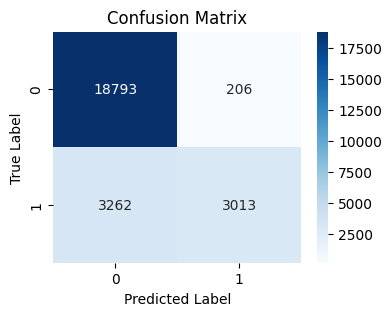

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score  

log_pipe = Pipeline([
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression(max_iter = 250))  
])

log_pipe.fit(X_train, y_train)

# Prediction
y_pred = log_pipe.predict(X_test)

# Probability predictions
y_proba = log_pipe.predict_proba(X_test)[:, 1]



# Evaluation
print(f"Model Accuracy: {log_pipe.score(X_test, y_test)}\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")

conf_matrix(test = y_test, pred = y_pred)

#### Analysis

- The logistic regression model achieves an overall accuracy of approximately 86%, indicating that it performs well in distinguishing between the two classes. However, the evaluation metrics reveal several important aspects about the model's performance, particularly regarding its handling of the positive class (class 1).

- The model reports a precision of 0.94 for class 1. This high precision indicates that when the model predicts a loan will default (class 1), it is highly accurate.

- Conversely, the recall for class 1 is notably low at 0.48. This suggests that the model is only identifying about half of the actual defaults, which is concerning. A low recall indicates that many true positive cases (loans that actually default) are being missed

- The F1-score for class 1 is 0.63, reflecting the trade-off between precision and recall.

- The confusion matrix shows that the model correctly predicted 18,792 instances of non-defaults (class 0) while misclassifying 207 as defaults. On the other hand, it predicted 3,010 true defaults correctly but failed to identify 3,265 actual defaults.


- The model's ROC-AUC score of 0.83 indicates reasonable performance in distinguishing between classes.

### Hyperparameter Tuning of Logistic Regression

To enhance the performance of the logistic regression model, we will implement hyperparameter tuning. This process involves systematically searching for the optimal combination of hyperparameters that control the learning process and model behavior. The goal is to improve model accuracy, precision, recall, and overall performance metrics.

We will utilize a parameter grid to explore various configurations, focusing on key hyperparameters that significantly influence the model's effectiveness:

- __Regularization Type (penalty)__: We will evaluate both L1 (Lasso) and L2 (Ridge) regularization to determine which method better prevents overfitting while maintaining model interpretability.

- __Regularization Strength (C)__: This parameter adjusts the strength of the regularization. We will use a logarithmic scale to explore a wide range of values. A lower value of C indicates stronger regularization, while a higher value allows the model to fit the training data more closely.

- __Class Weight (class_weight)__: We will test both 'balanced' and None settings to assess whether adjusting for class imbalance enhances the model's ability to predict the minority class (defaults).

- __Solver (solver)__: Different solvers can affect convergence and performance. We will experiment with 'liblinear' and 'saga', both of which support L1 and L2 penalties.

- __Maximum Iterations (max_iter)__: This parameter specifies the maximum number of iterations for the solver. We will evaluate the model's performance with different iteration limits to ensure convergence.


We will use `RandomizedSearchCV` which samples a fixed number of configurations from the specified parameter grid, making it computationally more efficient.

A 5-fold cross-validation strategy will be employed to ensure the robustness of the results, as this will allow us to evaluate model performance on multiple subsets of the data.

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters:  {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__max_iter': 400, 'classifier__class_weight': 'balanced', 'classifier__C': 1000.0}
Best ROC-AUC Score:  0.8264137836281492

Model Accuracy:  0.827015905673815

Confusion Matrix:
 [[17003  1996]
 [ 2376  3899]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     18999
           1       0.66      0.62      0.64      6275

    accuracy                           0.83     25274
   macro avg       0.77      0.76      0.76     25274
weighted avg       0.82      0.83      0.83     25274


ROC-AUC Score:  0.8269960402612928


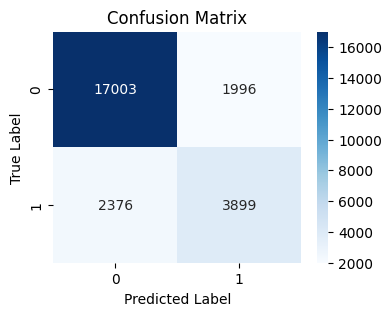

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

param_grid = {
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__C': np.logspace(-3, 3, 10),
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 250, 400] 
}

random_search = RandomizedSearchCV(
    estimator=log_pipe, param_distributions=param_grid,
    n_iter=30, scoring='roc_auc', cv=5,
    random_state=0, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)


print("Best Parameters: ", random_search.best_params_)
print("Best ROC-AUC Score: ", random_search.best_score_)

# Predict using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)
y_prob = random_search.best_estimator_.predict_proba(X_test)[:, 1]


# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score: ", roc_auc_score(y_test, y_prob))

conf_matrix(test = y_test, pred = y_pred)

#### Analysis

- The tuned model identified the optimal hyperparameters, including the solver set to 'liblinear', the penalty type as 'l2', and a balanced class weight strategy. The regularization strength was increased significantly with C at 215.44.


- The accuracy decreased to approximately 83%, and the ROC-AUC score slightly improved to 0.827.

- The precision for the positive class decreased to 0.66, which suggests a higher rate of false positives, while the recall improved slightly to 0.62. The F1-score also improved to 0.64, indicating a better balance between precision and recall compared to the untuned model.

While the ROC-AUC score improved, the overall accuracy dropped, suggesting that the model became more conservative in its predictions. This adjustment may help in enhancing the model's generalizability by reducing overfitting to the training data. 


#### Next Steps

The next step involves deploying a __Random Forest classifier__ to evaluate if a more complex model can enhance predictive performance, especially in detecting defaults. The Random Forest model may leverage its ensemble nature to improve recall and overall classification metrics, potentially addressing the shortcomings observed in the logistic regression model.


## 5.2 Random Forest Classifier

In this section, we will implement a Random Forest Classifier as our next modeling approach for predicting loan defaults. The Random Forest algorithm is an ensemble learning technique that builds multiple decision trees during training and merges their outputs to improve overall predictive performance and control overfitting.

By aggregating the predictions from numerous decision trees, it enhances the robustness of the model, making it less sensitive to noise and outliers.

In our analysis, we will leverage the benefits of Random Forest to evaluate its performance in comparison to the previously tuned Logistic Regression model. We will perform hyperparameter tuning to optimize the model settings and then assess its accuracy, ROC AUC score, and other relevant metrics to determine its effectiveness in predicting defaults.

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Preprocessing transformers

categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])


Model Accuracy: 0.8733876711244758

Confusion Matrix: 
 [[17905  1094]
 [ 2119  4156]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     18999
           1       0.79      0.66      0.72      6275

    accuracy                           0.87     25274
   macro avg       0.84      0.80      0.82     25274
weighted avg       0.87      0.87      0.87     25274


ROC-AUC Score: 
 0.876522559690183


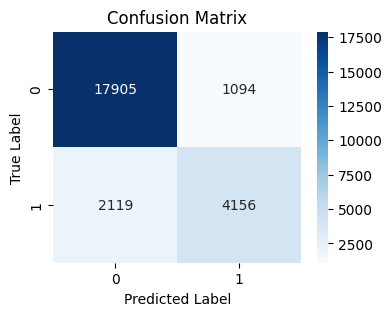

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, min_samples_split = 2, max_depth = 10, random_state=0)

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipe.fit(X_train, y_train)

# Prediction
y_pred = rf_pipe.predict(X_test)

# Evaluation
print(f"Model Accuracy: {rf_pipe.score(X_test, y_test)}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")


print(f"ROC-AUC Score: \n {roc_auc_score(y_test, rf_pipe.predict_proba(X_test)[:, 1])}")

conf_matrix(test = y_test, pred = y_pred)

#### Analysis

- The Random Forest Classifier achieved an accuracy of approximately 87%, indicating a robust performance in classifying loan defaults correctly.

-  The model achieved a ROC-AUC Score of 0.876, suggesting good discrimination capability between the classes (default and non-default).

- The confusion matrix shows that the model accurately predicted 17854 instances of the negative class (0) while misclassifying 1145 instances as positive (1). For the positive class, it correctly identified 4191 instances but misclassified 2084 as negative.

-  The precision for predicting defaults (class 1) is 0.79, meaning that when the model predicts a loan will default, it is correct about 79% of the time. The recall for class 1 stands at 0.67, indicating that the model captures about 67% of the actual defaults. 

- The F1-score for the positive class is 0.72, which reflects a balanced measure of precision and recall. This score is a significant improvement from the logistic regression's earlier performance and indicates a more effective model in dealing with class imbalance.

Overall, the Random Forest Classifier has demonstrated superior performance in both accuracy and ROC-AUC scores compared to the Logistic Regression models.

### Hyperparameter Tuning

We will tune the following hyperparameters of our RandomForestClassifier model:

 - __n_estimators__ - Number of trees in the forest.
- __max_depth__ - Maximum depth of a tree. This parameter helps control overfitting.
- __min_samples_split__ - Minimum number of samples required to split an internal node.
- __min_samples_leaf__ - Minimum number of samples required to be at a leaf node.
- __max_features__ - Number of features to consider when looking for the best split.

To efficiently explore this parameter space, we will employ `RandomizedSearchCV`, which allows for a more efficient search over a large hyperparameter space compared to exhaustive grid search. A 5-fold cross-validation will be employed to ensure that the model’s performance is robust and not dependent on a specific train-test split.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  33.0s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time= 1.4min
[CV] END classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  58.3s
[CV] END classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  58.6s
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  33.5s
[CV] END classifier__max_depth=5

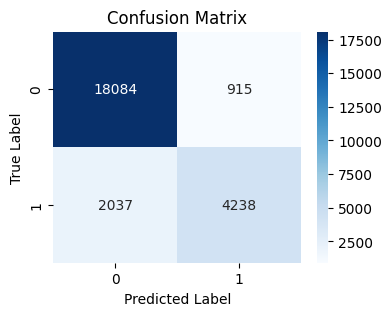

In [61]:
from sklearn.model_selection import RandomizedSearchCV


params = {
    'classifier__n_estimators': [100, 200, 300],   
    'classifier__max_depth': [5, 10, None],          
    'classifier__min_samples_split': [2, 5, 10],          
    'classifier__min_samples_leaf': [1, 2, 4],        
    'classifier__max_features': ['sqrt', 'log2']  
}


random_search = RandomizedSearchCV(rf_pipe, param_distributions=params, 
                                   n_iter=50, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1, random_state=0)


random_search.fit(X_train, y_train)

# Get the best parameters and model
best_model_rf = random_search.best_estimator_
print(random_search.best_params_)

# Evaluating the best model
y_pred_best = best_model_rf.predict(X_test)
print(f"Best Model Accuracy: {best_model_rf.score(X_test, y_test)}\n")

print(f"Classification Report : \n{classification_report(y_test, y_pred_best)}\n")

roc_auc = roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

print("Confusion Matrix:\n")
conf_matrix(test = y_test, pred = y_pred_best)

#### Analysis

- The best hyperparameters for our random forest model was found and shown above. These parameters were chosen based on their ability to balance the bias-variance trade-off effectively while ensuring that the model is robust against overfitting.

- Following the tuning, the model has shown improvements in its performance. Model accuracy is 88% and ROC-AUC is 0.88.

- Precision for class 1 is significantly increased from 0.79 to 0.83. Recall rate showed an increment of 0.01. Thus the F1 score for class 1 is improved to 0.74.

- For class 0, the precision, recall and f1-score shows high performance figures as before, but with an improvement.

- __ROC-AUC Score__: 0.8844 This score indicates strong model performance in distinguishing between the two classes, with the area under the curve suggesting good separability.


The tuning process has led to a well-optimized Random Forest model, which achieves a robust accuracy of approximately 88%. The high precision for the non-default class is promising; however, the recall for the default class suggests that, there are space for improvement.

With the Random Forest Classifier successfully tuned and evaluated, we will now proceed to train the XGBoost model.

## 5.3 XGBoost Classifier

XGBoost is an efficient implementation of gradient boosting, designed for performance. It is partlicularly well suited for our kind of structured data. This ML algorithm is well known for its robustness.

We will train an XGBoost classifier on our dataset. We will focus on optimizing the model's performance through hyperparameter tuning and evaluating its predictive accuracy. XGBoost incorporates regularization techniques, making it less prone to overfitting

In [62]:
categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]


# Preprocessing transformers

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
"""


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])

Model Accuracy: 0.8960196249109758

Confusion Matrix: 
 [[18673   326]
 [ 2305  3970]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     18999
           1       0.92      0.63      0.75      6275

    accuracy                           0.90     25274
   macro avg       0.91      0.81      0.84     25274
weighted avg       0.90      0.90      0.89     25274


ROC-AUC Score: 
 0.8875182946303108


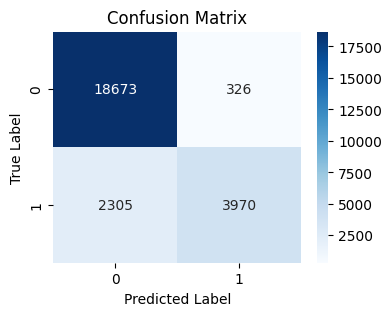

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

xgb_pipeline.fit(X_train, y_train)


# Prediction
y_pred = xgb_pipeline.predict(X_test)

# Evaluation
print(f"Model Accuracy: {xgb_pipeline.score(X_test, y_test)}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")


print(f"ROC-AUC Score: \n {roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])}")


conf_matrix(test=y_test, pred=y_pred)

#### Analysis

The XGBoost classifier achieves a high accuracy of approximately 90%, indicating strong overall performance on the dataset. The ROC-AUC score of 0.89 further underscores its effectiveness in distinguishing between the two classes, with values closer to 1 representing better model performance.

- For class 0, the precision is 0.89 and recall is 0.98. F1-score is 0.93. The model demonstrates excellent performance in identifying non-default cases, correctly predicting 98% of them while maintaining a high precision.

- For class 1, the precision is 0.93 and recall is 0.63. F1-score is 0.75. This suggests that the model misses a significant number of true positive cases (defaults).

Overall, the XGBoost model exhibits strong predictive capabilities, particularly for non-default cases. However, the lower recall for defaults highlights the need for further refinement, potentially through hyperparameter tuning

### Hyperparameter Tuning XGB

In this section, we will perform hyperparameter tuning for the XGBoost model using `RandomizedSearchCV`.

The following hyperparameters will be tuned:

- __n_estimators__: The number of trees in the ensemble.
- __learning_rate__: The learning rate determines the rate at which the boosting algorithm learns from each iteration.
- __max_depth__ : It shows how deeply each tree in the boosting process can go. The depth of a tree refers to the number of levels or splits it has from the root node to the leaf nodes. Increasing this value will make the model more complex and more likely to overfit.

We will search over 5 fold splits of the training data to tune the hyperparameters.

{'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}
Best Model Accuracy: 0.8959800585582021

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     18999
           1       0.93      0.63      0.75      6275

    accuracy                           0.90     25274
   macro avg       0.91      0.81      0.84     25274
weighted avg       0.90      0.90      0.89     25274


ROC-AUC Score: 0.8901977856246994
Confusion Matrix:



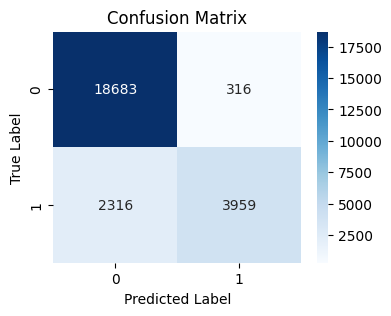

In [64]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 7, 10]
}
random_search = RandomizedSearchCV(xgb_pipeline, param_grid, cv=5, scoring='roc_auc',
                                  n_jobs=-1, random_state=0)

random_search.fit(X_train, y_train)


# Get the best parameters and model
best_model_xgb = random_search.best_estimator_
print(random_search.best_params_)

# Evaluating the best model
y_pred_best = best_model_xgb.predict(X_test)
print(f"Best Model Accuracy: {best_model_xgb.score(X_test, y_test)}\n")

print(f"Classification Report : \n{classification_report(y_test, y_pred_best)}\n")

roc_auc = roc_auc_score(y_test, best_model_xgb.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

print("Confusion Matrix:\n")
conf_matrix(test = y_test, pred = y_pred_best)

#### Analysis

The hyperparameter tuning for the XGBoost model maintained similar overall performance metrics compared to the pre-tuning results. 

Although the accuracy was slightly decreased, the ROC-AUC score was improved a little bit. Thus, the model's discrimination ability is seems to be enhanced.

The precision and recall metrics remained consistent, highlighting the model’s robust performance for non-defaulting loans

Next, we will do cross validation of the model, over 5 folds of the training dataset.

## 5.4 Cross Validation of the Model

In [65]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model_xgb, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC Score across folds: {cv_scores.mean()}")

Cross-validated AUC scores: [0.88785129 0.89333407 0.88511574 0.88457197 0.8893558 ]
Mean AUC Score across folds: 0.888045772590233


#### Analysis

To further evaluate the stability and reliability of our optimized XGBoost model, we performed cross-validation using 5 folds and assessed the model's performance through the ROC-AUC metric.


The cross-validation results indicate that the model performs consistently across different subsets of the data, with AUC scores ranging from approximately 0.885 to 0.892. This consistency suggests that the model is robust and likely to perform well on unseen data.

The mean AUC score of 0.8882 aligns closely with the performance observed during the initial training and hyperparameter tuning phases, reinforcing the model's reliability.

<a id='Interpretation'></a>

# 6. Model Interpretation & Insights: Feature Importance Analysis

### 6.1 Overview of Model Performance

The final XGBoost model demonstrated strong performance metrics, achieving an accuracy of 89.52% and a ROC-AUC score of 0.8906. These results indicate the model's effectiveness in distinguishing between loan defaults and non-defaults, providing a solid foundation for further analysis.

### 6.2 Classification Report Summary
The classification report reveals the following key statistics:

- Precision for Class 0 (Non-default): 0.89
- Recall for Class 0: 0.98
- Precision for Class 1 (Default): 0.93
- Recall for Class 1: 0.63

These metrics indicate that the model is particularly effective at identifying non-default loans while also maintaining a strong ability to detect defaults. Neverthless, there is still room for improvement in recall for class 1. Specifically, the model correctly identifies a high proportion of non-defaults (98%), but it misses a significant number of actual defaults.

### 6.3 Feature Importance

Feature importance analysis helps us understand the contribution of each feature to the model's predictions. In the context of the XGBoost model, feature importance can provide insights into which variables are driving predictions, enabling better interpretability

By examining the importance scores, we can identify the most influential features and consider their implications for our problem domain.

In [66]:
# Get the best XGBoost model from the pipeline after hyperparameter tuning
xgb_model = random_search.best_estimator_.named_steps['classifier']

# Feature names from the preprocessor
cat_features = random_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
num_features = random_search.best_estimator_.named_steps['preprocessor'].transformers_[0][1].named_steps['imputer'].get_feature_names_out()
all_features = list(num_features) + list(cat_features)

feature_importances = pd.Series(xgb_model.feature_importances_, index=all_features).sort_values(ascending=False)

print(feature_importances)

credit_type_EQUI                0.790586
lump_sum_payment_lpsm           0.044465
loan_type_type1                 0.021789
Neg_ammortization_neg_amm       0.019139
Credit_Worthiness_l1            0.018703
loan_type_type2                 0.008609
loan_type_type3                 0.008411
dtir1                           0.007116
loan_limit_cf                   0.007056
loan_purpose_p1                 0.006581
loan_purpose_p3                 0.005750
occupancy_type_pr               0.005277
LTV                             0.004997
occupancy_type_ir               0.004671
approv_in_adv_nopre             0.004446
income                          0.004165
interest_only_int_only          0.004057
Region_North                    0.004052
loan_purpose_p4                 0.003841
co-applicant_credit_type_CIB    0.003834
loan_amount                     0.002899
loan_purpose_p2                 0.002656
Gender_Joint                    0.002062
property_value                  0.002008
Gender_Male     



### 6.4 Feature Importance Analysis

The feature importance scores provide insights into the relative contribution of each feature to the model's predictions. Our top features are:

- __Credit_type__: This feature is the most influential one in predicting the loan default. As we have one-hot-encoded the categorical variables, credit_type_EQUI (borrowers with credit report obtained from Equifax) is particularly showing the most importance, where other categories of credit_type only show a weak predictive power. Neverthless, the average feature importance of these categories still calculates to 1st position (~19%).

- __Lump Sum Payment__: This feature indicates a notable influence on predictions, suggesting that the nature of payments affects loan performance. The not_lumpsum category does not at all contribute to the model. Even though, we can calculate the average score to be 2.22%.

- __Credit Worthiness__: A crucial indicator of the borrower's financial health, emphasizing its role in loan default predictions. The `l1` (low risk) category only contribute to the model. The other category scored zero only. The average importance score is 1.05%.



- __Loan Type__ : All three categories of the loan type feature contribute to the model, with a combined importance score of 3.69%, averaging 1.23% per category.

- __business_or_commercial__: This feature has not contributed to the model at all. This feature contained two classes of data and both of them have scored zero.



### 6.5 Implications for Business Decisions
The analysis of feature importance provides valuable insights for stakeholders in the lending domain:

- __Risk Assessment:__ Lenders can focus on key features such as rate of interest and credit type to improve risk assessment strategies. To highlight, an exceptional loan default property is seen for credit type EQUI, which is the credit report sourced from Equifax company. So, the lenders need to consider this fact and take necessary action to find why does it happen.

- __Refined Lending Policies:__ Understanding which features contribute most to defaults can help institutions create more informed lending policies and potentially mitigate risk through targeted interventions.

- __Predictive Analytics:__ The insights gained from feature importance can drive predictive analytics initiatives, leading to better decision-making processes and enhanced financial products.

### 6.6 Conclusion

The feature importance analysis has identified critical variables that influence loan default predictions. By leveraging these insights, financial institutions can enhance their risk management strategies, improve loan assessment processes, and ultimately drive better financial outcomes. Continued exploration of these features and their interactions will be vital for refining models and ensuring robust lending practices.

<a id='Deployment'></a>

# 7. Model Validation & Deployment

In this section, we focus on the validation of our trained model and the steps necessary for deploying it in a production environment. Model validation ensures that our predictive model performs well on unseen data, while deployment involves making the model available for real-world use.

After validation, we will deploy the model for real world use.

## 7.1 Model Validation

To validate our model, we will assess its performance using a separate test dataset that was not used during the training or tuning phases. Key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC will be calculated to evaluate the model's performance in predicting the target variable.



In [67]:
valid_data = pd.read_csv('valid_data.csv')
X_valid = valid_data.copy()
y_valid = X_valid.pop('Status')


# Summary of the validation data
print("Validation Data Summary \n")
print("Number of samples:",valid_data.shape[0])
print("\nDistribution of Status (target):\n", valid_data['Status'].value_counts(normalize=True).to_dict())
print("\nStatistics of Features:\n", valid_data.describe(include='all'))

Validation Data Summary 

Number of samples: 22301

Distribution of Status (target):
 {0: 0.7529707188018474, 1: 0.24702928119815254}

Statistics of Features:
                    ID     year loan_limit Gender approv_in_adv loan_type  \
count    22301.000000  22301.0      21817  22301         22172     22301   
unique            NaN      NaN          2      4             2         3   
top               NaN      NaN         cf   Male         nopre     type1   
freq              NaN      NaN      20287   6387         18674     17008   
mean     99731.132147   2019.0        NaN    NaN           NaN       NaN   
std      42918.322803      0.0        NaN    NaN           NaN       NaN   
min      24890.000000   2019.0        NaN    NaN           NaN       NaN   
25%      62244.000000   2019.0        NaN    NaN           NaN       NaN   
50%     100539.000000   2019.0        NaN    NaN           NaN       NaN   
75%     136715.000000   2019.0        NaN    NaN           NaN       NaN   
max 

Model Accuracy: 0.8948477646742299

Confusion Matrix: 
 [[16524   268]
 [ 2077  3432]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     16792
           1       0.93      0.62      0.75      5509

    accuracy                           0.89     22301
   macro avg       0.91      0.80      0.84     22301
weighted avg       0.90      0.89      0.89     22301


ROC-AUC Score: 
 0.887573485148085


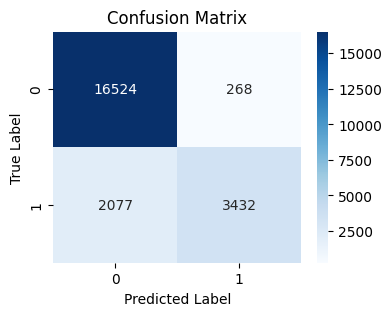

In [68]:
from sklearn.metrics import accuracy_score

# Prediction

y_pred = best_model_xgb.predict(X_valid)

# Evaluation
print(f"Model Accuracy: {accuracy_score(y_valid, y_pred)}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_valid, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_valid, y_pred)}\n")
print(f"ROC-AUC Score: \n {roc_auc_score(y_valid, best_model_xgb.predict_proba(X_valid)[:, 1])}")


conf_matrix(test=y_valid, pred=y_pred)

#### Analysis

- An __accuracy__ of 89.49% signifies that the model correctly classifies a high percentage of the validation set.

- __Precision for Class 0 (Non-default)__: 0.89 indicates that when the model predicts a non-default, it is correct 89% of the time.

- __Recall for Class 0__: 0.98 suggests that the model captures 98% of all actual non-default instances.

- __Precision for Class 1 (Default)__: 0.93 reflects a strong ability to identify defaults. 
 
- __Recall for Class 1:__ Recall of 0.62 indicates some room for improvement, meaning the model misses about 38% of actual defaults.

The confusion matrix further illustrates the model's performance, showing a higher number of true positives (3432) and true negatives (16525), with some false negatives (2077) and false positives (267).

The model demonstrates strong performance on unseen data.

## 7.2 Model Deployment

In this section, we will outline the process of deploying our trained XGBoost model for batch predictions. Batch prediction allows us to efficiently process large datasets by making predictions on multiple instances at once, rather than requiring real-time interaction.

To prepare for deployment, we will serialize the trained model, ensuring it can be easily loaded and utilized in future predictions.

We will save the trained model using a serialization library like joblib, allowing us to easily load it later for making predictions.



In [69]:
import joblib

# Save the model
joblib.dump(best_model_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [70]:
# batch predictions

new_data = {'ID': {0: 170054, 1: 1244, 2: 33228, 3: 75396, 4: 13660, 5: 54176, 6: 90586, 7: 13853, 8: 9158, 9: 13863},
 'year': {0: 2019, 1: 2019, 2: 2019, 3: 2019, 4: 2019, 5: 2019, 6: 2019, 7: 2019, 8: 2019, 9: 2019},
 'loan_limit': {0: 'cf', 1: 'cf', 2: 'cf', 3: 'cf', 4: 'cf', 5: 'cf', 6: 'cf', 7: 'cf', 8: 'cf', 9: 'cf'},
 'Gender': {0: 'Joint', 1: 'Male', 2: 'Male', 3: 'Sex Not Available', 4: 'Male', 5: 'Sex Not Available', 6: 'Female',
  7: 'Male', 8: 'Sex Not Available', 9: 'Sex Not Available'},
 'approv_in_adv': {0: 'pre', 1: 'nopre', 2: 'nopre', 3: 'pre', 4: 'nopre', 5: 'nopre', 6: 'nopre', 7: 'nopre', 8: 'nopre', 9: 'nopre'},
 'loan_type': {0: 'type2', 1: 'type1', 2: 'type1', 3: 'type1', 4: 'type2', 5: 'type1', 6: 'type3', 7: 'type1', 8: 'type1', 9: 'type1'},
 'loan_purpose': {0: 'p1', 1: 'p3', 2: 'p4', 3: 'p4', 4: 'p3', 5: 'p3', 6: 'p1', 7: 'p1', 8: 'p2', 9: 'p4'},
 'Credit_Worthiness': {0: 'l1', 1: 'l1', 2: 'l1', 3: 'l1', 4: 'l1', 5: 'l1', 6: 'l1', 7: 'l1', 8: 'l1', 9: 'l1'},
 'open_credit': {0: 'nopc', 1: 'nopc', 2: 'nopc', 3: 'nopc', 4: 'nopc', 5: 'nopc', 6: 'nopc', 7: 'nopc', 8: 'nopc', 9: 'nopc'},
 'business_or_commercial': {0: 'b/c', 1: 'nob/c', 2: 'nob/c', 3: 'nob/c', 4: 'b/c', 5: 'nob/c', 6: 'nob/c', 
                            7: 'nob/c', 8: 'nob/c',  9: 'nob/c'},
 'loan_amount': {0: 486500,  1: 456500,  2: 706500,  3: 196500,  4: 346500,  5: 146500,  6: 616500,  7: 196500,  8: 106500,  9: 496500},
 'rate_of_interest': {0: 4.125,  1: np.nan,  2: 3.25,  3: 3.5,  4: 3.49,  5: 4.875,  6: 3.125,  7: np.nan,  8: np.nan,  9: 3.99},
 'Interest_rate_spread': {0: 0.6687,  1: np.nan,  2: -0.3444,  3: -0.1606,  4: 0.3966,  5: 1.3592,  6: -0.663,  7: np.nan,  8: np.nan,  9: 0.4232},
 'Upfront_charges': {0: 1052.73,  1: np.nan,  2: 7024.0,  3: 343.75,  4: 0.0,  5: 1250.0,  6: 6100.0,  7: np.nan,  8: np.nan,  9: 0.0},
 'term': {0: 360.0,  1: 360.0,  2: 360.0,  3: 360.0,  4: 360.0,  5: 360.0,  6: 360.0,  7: 360.0,  8: 180.0,  9: 360.0},
 'Neg_ammortization': {0: 'not_neg',  1: 'not_neg', 2: 'not_neg', 3: 'not_neg', 4: 'not_neg', 5: 'not_neg',
                       6: 'not_neg', 7: 'not_neg', 8: 'not_neg', 9: 'neg_amm'},
 'interest_only': {0: 'not_int', 1: 'not_int', 2: 'not_int', 3: 'not_int', 4: 'not_int', 5: 'not_int',
                   6: 'not_int', 7: 'not_int', 8: 'not_int', 9: 'not_int'},
 'lump_sum_payment': {0: 'not_lpsm', 1: 'not_lpsm', 2: 'not_lpsm', 3: 'not_lpsm', 4: 'not_lpsm', 5: 'not_lpsm',
                      6: 'not_lpsm', 7: 'not_lpsm', 8: 'lpsm', 9: 'not_lpsm'},
 'property_value': {0: 498000.0, 1: 668000.0, 2: 948000.0, 3: 1458000.0, 4: 428000.0, 5: 248000.0, 6: 618000.0,
                     7: np.nan, 8: 268000.0, 9: 578000.0},
 'construction_type': {0: 'sb', 1: 'sb', 2: 'sb', 3: 'sb', 4: 'sb', 5: 'sb', 6: 'sb', 7: 'sb', 8: 'sb', 9: 'sb'},
 'occupancy_type': {0: 'pr', 1: 'ir', 2: 'pr', 3: 'pr', 4: 'pr', 5: 'sr', 6: 'pr', 7: 'pr', 8: 'pr', 9: 'pr'},
 'Secured_by': {0: 'home', 1: 'home', 2: 'home', 3: 'home', 4: 'home', 5: 'home', 6: 'home', 7: 'home', 8: 'home', 9: 'home'},
 'total_units': {0: '1U', 1: '1U', 2: '1U', 3: '1U', 4: '1U', 5: '1U', 6: '1U', 7: '1U', 8: '1U', 9: '1U'},
 'income': {0: 7860.0, 1: 780.0,  2: 12780.0, 3: 11820.0, 4: 3780.0, 5: 4560.0,
            6: 10920.0, 7: 3780.0, 8: 0.0, 9: 6180.0},
 'credit_type': {0: 'CRIF', 1: 'CRIF', 2: 'CIB', 3: 'CRIF', 4: 'EXP', 5: 'EXP', 6: 'EXP', 7: 'EQUI', 8: 'CRIF', 9: 'EXP'},
 'Credit_Score': {0: 741, 1: 849, 2: 731, 3: 742, 4: 522, 5: 858, 6: 680, 7: 602, 8: 886, 9: 674},
 'co-applicant_credit_type': {0: 'EXP', 1: 'CIB', 2: 'CIB', 3: 'CIB', 4: 'CIB', 5: 'EXP', 6: 'CIB', 7: 'EXP', 8: 'CIB', 9: 'CIB'},
 'age': {0: '35-44', 1: '35-44', 2: '35-44', 3: '45-54', 4: '65-74',
         5: '55-64', 6: '35-44', 7: '35-44', 8: '45-54', 9: '35-44'},
 'submission_of_application': {0: 'not_inst', 1: 'not_inst', 2: 'not_inst', 3: 'to_inst',
                               4: 'not_inst', 5: 'to_inst', 6: 'not_inst', 7: 'to_inst', 8: 'to_inst', 9: 'not_inst'},
 'LTV': {0: 97.69076305, 1: 68.33832335, 2: 74.52531646, 3: 13.47736626, 4: 80.95794393, 
         5: 59.07258065, 6: 99.75728155, 7: np.nan, 8: 39.73880597, 9: 85.89965398},
 'Region': {0: 'North', 1: 'North', 2: 'North', 3: 'south', 4: 'central', 5: 'south',
             6: 'North', 7: 'North', 8: 'south', 9: 'south'},
 'Security_Type': {0: 'direct', 1: 'direct', 2: 'direct', 3: 'direct', 4: 'direct',
                   5: 'direct', 6: 'direct', 7: 'direct', 8: 'direct', 9: 'direct'},
 'dtir1': {0: 42.0, 1: 13.0, 2: 32.0, 3: 42.0, 4: 55.0, 5: 36.0, 6: 29.0, 7: np.nan, 8: 18.0, 9: 46.0}}

new_data_df = pd.DataFrame(new_data)

In [71]:
# Load the model
loaded_model = joblib.load('xgboost_model.pkl')

predictions = loaded_model.predict(new_data_df)

print(predictions)

[0 1 0 0 0 0 0 1 1 0]


We have successfully deployed our model for batch predictions and done the prediction on a given set of data. The input data was in fact a replica of our source dataset itself, including all of the features. Our deployed model has successfully predicted the `Status` or loan default classification for the queried data.


<a id='Conclusion'></a>

# 8. Conclusion

The main objective of this project is to build a robust machine learning model that can predict whether a loan will default. We have succesfully trained and deployed such a model with 89% accuracy, using a dataset of relevant features. The model has also achieved ROC-AUC score of 0.88.

The souce dataset contained 34 columns, including one target variable. Extensive exploratory data analysis was performed on each variable, to assess the distribution, trends and completness of the data.

Given the insights from the data analysis, proper missing value handling strategies were decided, in which we have extensively tried to make sure that, the dataset is not getting biased.

Considering the results of the above analyses, measurements of predictive power of each variable through statistical tests and mutual information scores and the business understandings of the dataset, we selected the most relevant 19 features.

Various types of models were trained, evaluated, and compared their performance metrices. Out of logistic regression, random forest classifier and XGBoost classifier, the most performing model was the graident boosting type. We have validated the best performing model and also have deployed it succesfully.


### Limitations

Despite its success, this project faced certain limitations, including a limited dataset that might have affected the performance of the model. Strategically important attributes had to be removed from the list of features, because of the lack of integrity. Therefore, the model's predictive power is not divided in a good manner.

Although the model's accuracy is outstanding, the model is not much conservative in its performance. The recall rate for loan default cases (class 1) is nearly 63%, i.e. the model fails to correctly predict about 38% of actual positive cases.

### Future Work

Future work may involve collecting a larger dataset, ensuring integrity in key features, which could improve the prediction accuracy and target class balance, especially to mitigate the __Type II Error__. Identifying true positives and thus increasing the recall rate for positive class is relevant for the business problem. 

Although we explored some feature engineering trends in the analysis section, none were added while training the model. So, inclusion of newly derived features may be beneficial for the model.

As the training dataset's target variable itself is imbalanced, implementation of class balancing techniques, such as Synthetic Minority Oversampling Technique (SMOTE) may help to improve the performance of model.

Furthermore, implementing a refined version of this model within a real-time application could allow for automated decision-making in loan approvals.

# References

#### Dataset used
- M Yasser H. (Owner). Dataset Title [Data set]. Kaggle. 

    Retrieved from https://www.kaggle.com/datasets/yasserh/loan-default-dataset

    License: CC0 Public Domain, Google (Source), Research (Methodology).
    
#### Libraries Used

- Reback, J., et al., (2023). pandas-dev/pandas: Pandas. Zenodo. https://doi.org/10.5281/zenodo.3509134

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830. https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html


- Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. In *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining* (pp. 785–794). https://doi.org/10.1145/2939672.2939785


- Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. *Computing in Science & Engineering*, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55


<a id='Appendix'></a>

# 9. Appendix

<a id='appendix_analysis_irs'></a>

### 9.1 Interest Rate Spread Detailed - Analysis

The insights are explained in the <a href='#EDA Interest'>EDA section.</a>

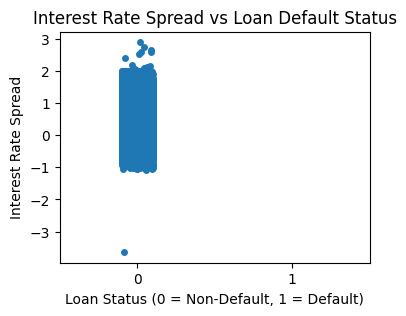

In [72]:
plt.figure(figsize = (4,3))
sns.stripplot(x='Status', y='Interest_rate_spread', data=data, jitter=True)
plt.title('Interest Rate Spread vs Loan Default Status')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Interest Rate Spread')
plt.show()

In [73]:
status_spread_summary = data.groupby('Status')['Interest_rate_spread'].apply(lambda x: x.isnull().sum())
non_missing_summary = data.groupby('Status')['Interest_rate_spread'].apply(lambda x: x.notnull().sum())

print("Missing values grouped by Status:")
print(status_spread_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_summary)

Missing values grouped by Status:
Status
0        0
1    31130
Name: Interest_rate_spread, dtype: int64

Non-missing values grouped by Status:
Status
0    95239
1        0
Name: Interest_rate_spread, dtype: int64


In [74]:
print("Interest Rate Spread Counts: ",data.groupby('Status')['Interest_rate_spread'].count())

Interest Rate Spread Counts:  Status
0    95239
1        0
Name: Interest_rate_spread, dtype: int64


#### Checking the performance after missing value handling

In [75]:
median_irs = data['Interest_rate_spread'].median()
data['new_irs'] = data['Interest_rate_spread'].fillna(median_irs)
data.groupby('Status')['new_irs'].count()

Status
0    95239
1    31130
Name: new_irs, dtype: int64

In [76]:
data[['new_irs','Status']].corr()

new_irs    Status
new_irs  1.000000 -0.049948
Status  -0.049948  1.000000

<a id='9.2'></a>

### 9.2 Rate of Interest - Detailed Analysis

The key findings from here are explained in the <a href='#EDA Interest'>EDA section.</a>

In [77]:
status_roi_summary = data.groupby('Status')['rate_of_interest'].apply(lambda x: x.isnull().sum())
non_missing_roi_summary = data.groupby('Status')['rate_of_interest'].apply(lambda x: x.notnull().sum())

print("Missing values in the rate of interest column: \n", data['rate_of_interest'].isnull().sum())
print("\n \nMissing values grouped by Status:")
print(status_roi_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_roi_summary)

print("\n\nRate of Interset Counts \n ",data.groupby('Status')['rate_of_interest'].count())

Missing values in the rate of interest column: 
 30967

 
Missing values grouped by Status:
Status
0        0
1    30967
Name: rate_of_interest, dtype: int64

Non-missing values grouped by Status:
Status
0    95239
1      163
Name: rate_of_interest, dtype: int64


Rate of Interset Counts 
  Status
0    95239
1      163
Name: rate_of_interest, dtype: int64


In [78]:
median_rate_of_int = data['rate_of_interest'].median()
data['new_roi'] = data['rate_of_interest'].fillna(median_rate_of_int)
data.groupby('Status')['new_roi'].count()

Status
0    95239
1    31130
Name: new_roi, dtype: int64

In [79]:
data[['new_roi','Status']].corr()

new_roi    Status
new_roi  1.000000 -0.046869
Status  -0.046869  1.000000

<a id='9.3'></a>

### 9.3 Upfront Charges - Detailed Analysis

The key findings from here are explained in the <a href='#EDA Upfront'>EDA section.</a>

In [80]:
status_upfront_summary = data.groupby('Status')['Upfront_charges'].apply(lambda x: x.isnull().sum())
non_missing_upfront_summary = data.groupby('Status')['Upfront_charges'].apply(lambda x: x.notnull().sum())

print("Missing values in the Upfront_charges column: \n", data['Upfront_charges'].isnull().sum())
print("\n \nMissing values grouped by Status:")
print(status_upfront_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_upfront_summary)

print("\n\nUpfront_charges Counts \n ",data.groupby('Status')['Upfront_charges'].count())

Missing values in the Upfront_charges column: 
 33723

 
Missing values grouped by Status:
Status
0     2719
1    31004
Name: Upfront_charges, dtype: int64

Non-missing values grouped by Status:
Status
0    92520
1      126
Name: Upfront_charges, dtype: int64


Upfront_charges Counts 
  Status
0    92520
1      126
Name: Upfront_charges, dtype: int64


In [81]:
median_upc = data['Upfront_charges'].median()
data['new_upc'] = data['Upfront_charges'].fillna(median_upc)
data.groupby('Status')['new_upc'].count()

Status
0    95239
1    31130
Name: new_upc, dtype: int64

In [82]:
data[['new_upc','Status']].corr()

new_upc    Status
new_upc  1.000000 -0.095003
Status  -0.095003  1.000000

<a id='9.4'></a>

### 9.4 Property Value and LTV - Detailed Analysis

Key insights are shared under <a href='#LTV'> EDA.</a>

In [83]:
status_property_value_summary = data.groupby('Status')['property_value'].apply(lambda x: x.isnull().sum())
non_missing_property_value_summary = data.groupby('Status')['property_value'].apply(lambda x: x.notnull().sum())

print("Missing values in the property_value column: \n", data['property_value'].isnull().sum())
print("\n \nMissing values grouped by Status:")
print(status_property_value_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_property_value_summary)

print("\n\nproperty_value Counts \n ",data.groupby('Status')['property_value'].count())

Missing values in the property_value column: 
 12829

 
Missing values grouped by Status:
Status
0        2
1    12827
Name: property_value, dtype: int64

Non-missing values grouped by Status:
Status
0    95237
1    18303
Name: property_value, dtype: int64


property_value Counts 
  Status
0    95237
1    18303
Name: property_value, dtype: int64


In [84]:
status_LTV_summary = data.groupby('Status')['LTV'].apply(lambda x: x.isnull().sum())
non_missing_LTV_summary = data.groupby('Status')['LTV'].apply(lambda x: x.notnull().sum())

print("Missing values in the LTV column: \n", data['LTV'].isnull().sum())
print("\n \nMissing values grouped by Status:")
print(status_LTV_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_LTV_summary)

print("\n\nLTV Counts \n ",data.groupby('Status')['LTV'].count())

Missing values in the LTV column: 
 12829

 
Missing values grouped by Status:
Status
0        2
1    12827
Name: LTV, dtype: int64

Non-missing values grouped by Status:
Status
0    95237
1    18303
Name: LTV, dtype: int64


LTV Counts 
  Status
0    95237
1    18303
Name: LTV, dtype: int64


In [85]:
median_pv = data['property_value'].median()
data['new_pv'] = data['property_value'].fillna(median_pv)
data.groupby('Status')['new_pv'].count()

Status
0    95239
1    31130
Name: new_pv, dtype: int64

In [86]:
median_ltv = data['LTV'].median()
data['new_ltv'] = data['LTV'].fillna(median_ltv)
data.groupby('Status')['new_ltv'].count()

Status
0    95239
1    31130
Name: new_ltv, dtype: int64

In [87]:
data[['new_ltv','new_pv','Status']].corr()

new_ltv    new_pv    Status
new_ltv  1.000000 -0.205533  0.040451
new_pv  -0.205533  1.000000 -0.083151
Status   0.040451 -0.083151  1.000000

<a id='9.5'></a>

### 9.5 Debt to Income Ratio - Detailed Analysis

Key insights are shared under <a href='#DTIR'> EDA.</a>

In [88]:
status_dtir1_summary = data.groupby('Status')['dtir1'].apply(lambda x: x.isnull().sum())
non_missing_dtir1_summary = data.groupby('Status')['dtir1'].apply(lambda x: x.notnull().sum())

print("Missing values in the dtir1 column: \n", data['dtir1'].isnull().sum())
print("\n \nMissing values grouped by Status:")
print(status_dtir1_summary)

print("\nNon-missing values grouped by Status:")
print(non_missing_dtir1_summary)

print("\n\ndtir1 Counts \n ",data.groupby('Status')['dtir1'].count())

Missing values in the dtir1 column: 
 20540

 
Missing values grouped by Status:
Status
0     6680
1    13860
Name: dtir1, dtype: int64

Non-missing values grouped by Status:
Status
0    88559
1    17270
Name: dtir1, dtype: int64


dtir1 Counts 
  Status
0    88559
1    17270
Name: dtir1, dtype: int64


In [89]:
median_dtir1 = data['dtir1'].median()
data['new_dtir1'] = data['dtir1'].fillna(median_dtir1)
data.groupby('Status')['new_dtir1'].count()

Status
0    95239
1    31130
Name: new_dtir1, dtype: int64

In [90]:
data[['new_dtir1','Status']].corr()

new_dtir1    Status
new_dtir1   1.000000  0.082471
Status      0.082471  1.000000

<a id='9.6'></a>

### 9.6 Chi-Square Test on Loan_purpose vs Status

Key insights are shared under the <a href='#loan_purpose'> EDA of loan_purpose variable.</a>

In [91]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['loan_purpose'], data['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f'Chi-Square Test p-value: {p}')
print(f'Expected Frequency \n: {expected}')

Chi-square statistic: 181.54397818042247
Chi-Square Test p-value: 4.092887248719546e-39
Expected Frequency 
: [[22127.32388119  7232.67611881]
 [ 2068.78419802   676.21580198]
 [35742.10950495 11682.89049505]
 [35210.78241584 11509.21758416]]


<a id='9.7'></a>

### 9.7 Analysis of Secured_by, Construction_Type, Security_Type


In [92]:
data[data['construction_type'] == 'mh'][['Secured_by', 'construction_type', 'Security_Type']].reset_index()

index Secured_by construction_type Security_Type
0      955       land                mh      Indriect
1     8437       land                mh      Indriect
2    12540       land                mh      Indriect
3    12638       land                mh      Indriect
4    15233       land                mh      Indriect
5    30735       land                mh      Indriect
6    31490       land                mh      Indriect
7    45763       land                mh      Indriect
8    53189       land                mh      Indriect
9    54014       land                mh      Indriect
10   59980       land                mh      Indriect
11   68855       land                mh      Indriect
12   70361       land                mh      Indriect
13   80665       land                mh      Indriect
14   84622       land                mh      Indriect
15   86442       land                mh      Indriect
16   88917       land                mh      Indriect
17   90292       land                mh      Indriect
18   91173       land                mh      Indriect
19   93456       land                mh      Indriect
20   98546       land                mh      Indriect
21   99661       land                mh      Indriect
22  100133       land                mh      Indriect
23  103096       land                mh      Indriect
24  105920       land                mh      Indriect
25  106101       land                mh      Indriect
26  107431       land                mh      Indriect
27  111181       land                mh      Indriect
28  111444       land                mh      Indriect
29  117862       land                mh      Indriect

<a id='9.8'></a>

### 9.8 Missing Value Handling Strategy - Gender



In [93]:
print("Ratio of females in each region: \n",gender_region['Female']/gender_region['Total'])
print("\nRatio of males in each region: \n",gender_region['Male']/gender_region['Total'])
print("\nRatio of joint applicants in each region: \n",gender_region['Joint']/gender_region['Total'])
print("\nRatio of 'Sex Unknown' in each region: \n",gender_region['Sex Not Available']/gender_region['Total'])

Ratio of females in each region: 
 Region
North         0.241084
North-East    0.313264
central       0.283877
south         0.100481
Total         0.183589
dtype: float64

Ratio of males in each region: 
 Region
North         0.382074
North-East    0.497648
central       0.283877
south         0.166887
Total         0.284556
dtype: float64

Ratio of joint applicants in each region: 
 Region
North         0.368379
North-East    0.174036
central       0.423717
south         0.155761
Total         0.278336
dtype: float64

Ratio of 'Sex Unknown' in each region: 
 Region
North         0.008463
North-East    0.015052
central       0.008528
south         0.576871
Total         0.253519
dtype: float64


We can see that, the missing data in South is shifting the ratios of gender also. Since the South region has an unusually high proportion of `Sex Not Available`, it would be more reasonable to exclude it from our imputation calculations.

In [94]:
df = data[(data['Gender'] != 'Sex Not Available') & (data['Region'] != 'south')]
gender_counts = df['Gender'].value_counts(normalize = True)

probabilities = gender_counts.to_dict()
print(probabilities)

{'Male': 0.3769236164691029, 'Joint': 0.3743985410675458, 'Female': 0.24867784246335134}


In [95]:
gender_counts  = pd.DataFrame(data.groupby('Region')['Gender'].value_counts())
gender_counts.columns = ['Count']
total_by_region = gender_counts.groupby('Region')['Count'].sum()
gender_counts = gender_counts.join(total_by_region, on='Region', rsuffix='_Total')
gender_counts['Probability'] = gender_counts['Count'] / gender_counts['Count_Total']
gender_counts

Count  Count_Total  Probability
Region     Gender                                            
North      Male               24243        63451     0.382074
           Joint              23374        63451     0.368379
           Female             15297        63451     0.241084
           Sex Not Available    537        63451     0.008463
North-East Male                 529         1063     0.497648
           Female               333         1063     0.313264
           Joint                185         1063     0.174036
           Sex Not Available     16         1063     0.015052
central    Joint               3130         7387     0.423717
           Female              2097         7387     0.283877
           Male                2097         7387     0.283877
           Sex Not Available     63         7387     0.008528
south      Sex Not Available  31421        54468     0.576871
           Male                9090        54468     0.166887
           Joint               8484        54468     0.155761
           Female              5473        54468     0.100481

In [96]:
X = data.copy()

df = X[(X['Region'] != 'south') & (X['Gender'] != "Sex Not Available")]

# Calculating gender probabilities
gender_counts = df['Gender'].value_counts(normalize=True)
probabilities = gender_counts.to_dict()


X_copy = X.copy()

# Replace 'Sex Not Available' with probabilistic values based on the earlier caluclated probabilities
for i, row in X_copy.iterrows():
    if row['Gender'] == 'Sex Not Available':
        X_copy.at[i, 'Gender'] = np.random.choice(list(probabilities.keys()),
                                                          p=list(probabilities.values()))


In [97]:
# After implementing probabilistic imputer

gender_counts  = pd.DataFrame(X_copy.groupby('Region')['Gender'].value_counts())
gender_counts.columns = ['Count']
total_by_region = gender_counts.groupby('Region')['Count'].sum()
gender_counts = gender_counts.join(total_by_region, on='Region', rsuffix='_Total')
gender_counts['Probability'] = gender_counts['Count'] / gender_counts['Count_Total']
gender_counts

Count  Count_Total  Probability
Region     Gender                                 
North      Male    24446        63451     0.385274
           Joint   23580        63451     0.371625
           Female  15425        63451     0.243101
North-East Male      535         1063     0.503293
           Female    336         1063     0.316087
           Joint     192         1063     0.180621
central    Joint    3155         7387     0.427102
           Male     2122         7387     0.287261
           Female   2110         7387     0.285637
south      Male    20950        54468     0.384630
           Joint   20220        54468     0.371227
           Female  13298        54468     0.244143

<a id = '9.9'></a>

## 9.9 Comparison of Model Performance with Upfront Charges Feature

### 9.9.1 Training Random Forest Model with Upfront_charges

In [98]:
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value', 'Upfront_charges']


cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
                'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
                'co-applicant_credit_type', 'Region']

features = num_features + cat_features

from sklearn.model_selection import train_test_split

X = data[features].copy()
y = data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [99]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


# Preprocessing transformers

# Custom Transformer for probabilistic imputation of 'Gender' column

class ProbabilisticImputer(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_region=None, columns = None):
        self.exclude_region = exclude_region
        self.probabilities = {}
        self.columns = columns

    def fit(self, X, y=None):
        # If X is a DataFrame, store the columns
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        # Convert X to DataFrame (after setting the column names)
        
        df = X[(X['Region'] != self.exclude_region) & (X['Gender'] != "Sex Not Available")]

        # Calculating gender probabilities
        gender_counts = df['Gender'].value_counts(normalize=True)
        self.probabilities = gender_counts.to_dict()
        return self

    def transform(self, X):
        # If X is a NumPy array, convert it to DataFrame using stored column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        X_copy = X.copy()

        # Replace 'Sex Not Available' with probabilistic values based on the earlier caluclated probabilities
        for i, row in X_copy.iterrows():
            if row['Gender'] == 'Sex Not Available':
                X_copy.at[i, 'Gender'] = np.random.choice(list(self.probabilities.keys()),
                                                          p=list(self.probabilities.values()))

        return X_copy


categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, min_samples_split = 2, max_depth = 10, random_state=0)

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipe.fit(X_train, y_train)

# Prediction
y_pred = rf_pipe.predict(X_test)

# Evaluation
print(f"Model Accuracy: {rf_pipe.score(X_test, y_test)}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")


print(f"ROC-AUC Score: \n {roc_auc_score(y_test, rf_pipe.predict_proba(X_test)[:, 1])}")

Model Accuracy: 0.9800189918493313

Confusion Matrix: 
 [[18513   486]
 [   19  6256]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18999
           1       0.93      1.00      0.96      6275

    accuracy                           0.98     25274
   macro avg       0.96      0.99      0.97     25274
weighted avg       0.98      0.98      0.98     25274


ROC-AUC Score: 
 0.9963683305621662


### 9.9.2 Training Random Forest Model without Upfront_charges

In [101]:
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']


cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
                'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
                'co-applicant_credit_type', 'Region']

features = num_features + cat_features


X = data[features].copy()
y = data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)



# Preprocessing transformers

categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])



rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, min_samples_split = 2, max_depth = 10, random_state=0)

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipe.fit(X_train, y_train)

# Prediction
y_pred = rf_pipe.predict(X_test)

# Evaluation
print(f"Model Accuracy: {rf_pipe.score(X_test, y_test)}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")


print(f"ROC-AUC Score: \n {roc_auc_score(y_test, rf_pipe.predict_proba(X_test)[:, 1])}")

Model Accuracy: 0.8726359104217773

Confusion Matrix: 
 [[17878  1121]
 [ 2095  4180]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     18999
           1       0.79      0.67      0.72      6275

    accuracy                           0.87     25274
   macro avg       0.84      0.80      0.82     25274
weighted avg       0.87      0.87      0.87     25274


ROC-AUC Score: 
 0.876204635639242


## 9.10 The Whole Model - In a Nutshell

The tuned model pipeline, with all its components is hereby given

Model Accuracy: 0.895584395030466

Confusion Matrix: 
 [[18682   317]
 [ 2321  3954]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     18999
           1       0.93      0.63      0.75      6275

    accuracy                           0.90     25274
   macro avg       0.91      0.81      0.84     25274
weighted avg       0.90      0.90      0.89     25274


ROC-AUC Score: 
 0.8905258674759355


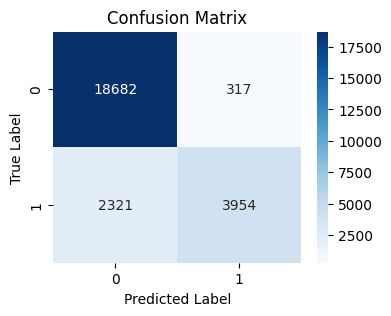

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


data = pd.read_csv('train_data.csv')

num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']


cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
               'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
               'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
               'co-applicant_credit_type', 'Region']

features = num_features + cat_features


X = data[features].copy()
y = data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)


# Function for plotting Confusion Matrix
def conf_matrix(test, pred):
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(test, pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    
# Custom Transformer for probabilistic imputation of 'Gender' column


class ProbabilisticImputer(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_region=None, columns = None):
        self.exclude_region = exclude_region
        self.probabilities = {}
        self.columns = columns

    def fit(self, X, y=None):
        # If X is a DataFrame, store the columns
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        # Convert X to DataFrame (after setting the column names)
        
        df = X[(X['Region'] != self.exclude_region) & (X['Gender'] != "Sex Not Available")]

        # Calculating gender probabilities
        gender_counts = df['Gender'].value_counts(normalize=True)
        self.probabilities = gender_counts.to_dict()
        return self

    def transform(self, X):
        # If X is a NumPy array, convert it to DataFrame using stored column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)

        X_copy = X.copy()

        # Replace 'Sex Not Available' with probabilistic values based on the earlier caluclated probabilities
        for i, row in X_copy.iterrows():
            if row['Gender'] == 'Sex Not Available':
                X_copy.at[i, 'Gender'] = np.random.choice(list(self.probabilities.keys()),
                                                          p=list(self.probabilities.values()))

        return X_copy

    



# Preprocessing transformers

categorical_columns = [col for col in X_train.columns if X_train[col].dtype in ['category', 'object']]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('prob_imputer', ProbabilisticImputer(exclude_region='south', columns =categorical_columns)),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Num_transformer with scaler

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
"""
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
"""

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns)
])



# Modeling

# Tuned hyperparameters are used
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                         n_estimators = 200, max_depth = 7, learning_rate = 0.1)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

xgb_pipeline.fit(X_train, y_train)


# Prediction
y_pred = xgb_pipeline.predict(X_test)


# Evaluation
print(f"Model Accuracy: {xgb_pipeline.score(X_test, y_test)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")
print(f"ROC-AUC Score: \n {roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])}")
conf_matrix(test=y_test, pred=y_pred)